# DeepLabCut Toolbox - DEMO (mouse reaching)
https://github.com/AlexEMG/DeepLabCut

Nath\*, Mathis\* et al. *Using DeepLabCut for markerless pose estimation during behavior across species
user guide: https://www.biorxiv.org/content/10.1101/476531v1

This notebook demonstrates the use of the DeepLabCut toolbox for a provided demo dataset based on *Somatosensory Cortex Plays an Essential Role in Forelimb Motor Adaptation in Mice* by Mathis et al., Neuron 2017. DOI:https://doi.org/10.1016/j.neuron.2017.02.049

This notebook illustrates how to:
- plot the labeled images
- train a network
- evaluate a network
- analyze a novel video
- create an automatically labeled video 
- plot the trajectories 
- identify outlier frames
- annotate the outlier frames manually
- merge the data sets and update the training set
- train a network

Note: This notebook starts from an already initialized project with labeled data.

 Note: The noteboks will not work in Docker, as Docker is designed to not display GUIs. Please follow the steps outlined here: https://github.com/AlexEMG/DeepLabCutbeta/blob/master/docs/UseOverviewGuide.md#option-2-using-terminal-start-python

# Not in Colab or Docker, great, then start here!

First, be sure you are in the Anaconda Python! Go to "Kernel > Change Kernel > and selection Python [conda enc: DLC2]" (or whatever you call your conda environment!

## Import the DLC toolbox:

In [1]:
import deeplabcut

In [2]:
# OPTIONAL: just an example of how for you to see that TF is here!
import tensorflow as tf
tf.__version__

'1.14.0'

When you use DeepLabCut on your own data, you will (1) create a project, (2) extract frames to label, and (3) label you data. In this demo, this is all done for you. The purpose of the demo to for you to get familiar with the workflow (and check your installation).

In [3]:
# Loading example data set, st config_path and creating the training set: 
import os
# Note that parameters of this project can be seen at: *Reaching-Mackenzie-2018-08-30/config.yaml*
from pathlib import Path

#create a variable to set the config.yaml file path:
path_config_file = os.path.join(os.getcwd(),'Reaching-Mackenzie-2018-08-30/config.yaml')

#let's load some demo data, and create a training set (this function is not used when you create your own project):
deeplabcut.load_demo_data(path_config_file)

Loaded, now creating training data...
/home/braincreator/Pose_estimation/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/training-datasets/iteration-0/UnaugmentedDataSet_ReachingAug30  already exists!
/home/braincreator/Pose_estimation/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/dlc-models/iteration-0/ReachingAug30-trainset95shuffle1  already exists!
/home/braincreator/Pose_estimation/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/dlc-models/iteration-0/ReachingAug30-trainset95shuffle1//train  already exists!
/home/braincreator/Pose_estimation/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/dlc-models/iteration-0/ReachingAug30-trainset95shuffle1//test  already exists!
The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


In [4]:
#Perhaps plot the labels to see how the frames were annotated:
deeplabcut.check_labels(path_config_file)

Creating images with labels by Mackenzie.
/home/braincreator/Pose_estimation/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/labeled-data/reachingvideo1_labeled  already exists!
They are stored in the following folder: /home/braincreator/Pose_estimation/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/labeled-data/reachingvideo1_labeled.
If all the labels are ok, then use the function 'create_training_dataset' to create the training dataset!


*Note: in this demo the training set was already created, so you don't need to do this and can directly proceed to train the network!*

## Start training of Feature Detectors
This function trains the network for a specific shuffle of the training dataset. **The user can set various parameters in /Reaching-Mackenzie-2018-08-30/dlc-models/ReachingAug30-trainset95shuffle1/iteration-0/train/pose_cfg.yaml.**

Training can be stopped at any time. Note that the weights are only stored every 'save_iters' steps. For this demo the it is advisable to store & display the progress very often (i.e. display every 20, save every 100). In practice this is inefficient.  **Go change the pose_cfg file now!**

**We recommend just training for 10-20 min, as you aren't running this demo to use DLC, just to work through the steps. In total, this demo should take you LESS THAN 1 HOUR!**

In [5]:
deeplabcut.train_network(path_config_file, shuffle=1, saveiters=300, displayiters=20)
#notice the variables "saveiters" and "dsiplayiters" that can be set in the function

#you just need to run this until you get at least 1 snapshot, which is set by: "save_iters" 
#(so in this case you could stop after 500!) How do I stop? Click the STOP button!
# To train until ~300 iterations on a CPU should be ~6 min

Config:
{'all_joints': [[0], [1], [2], [3]],
 'all_joints_names': ['Hand', 'Finger1', 'Finger2', 'Joystick'],
 'batch_size': 1,
 'bottomheight': 400,
 'crop': True,
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets/iteration-0/UnaugmentedDataSet_ReachingAug30/Reaching_Mackenzie95shuffle1.mat',
 'dataset_type': 'default',
 'deterministic': False,
 'display_iters': 1000,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': '/home/braincreator/anaconda3/envs/dlc/lib/python3.6/site-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'leftwidth': 400,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 0.05,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'max_input_size': 1500,
 'mean_pixel': [123.68, 116.779, 103.939],
 'metadataset': 'training-datasets/iteration-0/UnaugmentedDataSet_ReachingAug30/Documentation_data-Reaching_95shuff

Starting with standard pose-dataset loader.


W0729 14:58:49.230019 140178413049664 deprecation.py:323] From /home/braincreator/anaconda3/envs/dlc/lib/python3.6/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0729 14:58:49.244278 140178413049664 deprecation.py:323] From /home/braincreator/anaconda3/envs/dlc/lib/python3.6/site-packages/deeplabcut/pose_estimation_tensorflow/nnet/losses.py:38: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.
W0729 14:58:53.420474 140178413049664 deprecation.py:323] From /home/braincreator/anaconda3/envs/dlc/lib/python3.6/site-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will b

Display_iters overwritten as 20
Save_iters overwritten as 300
Training parameter:
{'stride': 8.0, 'weigh_part_predictions': False, 'weigh_negatives': False, 'fg_fraction': 0.25, 'weigh_only_present_joints': False, 'mean_pixel': [123.68, 116.779, 103.939], 'shuffle': True, 'snapshot_prefix': '/home/braincreator/Pose_estimation/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/dlc-models/iteration-0/ReachingAug30-trainset95shuffle1/train/snapshot', 'log_dir': 'log', 'global_scale': 0.8, 'location_refinement': True, 'locref_stdev': 7.2801, 'locref_loss_weight': 0.05, 'locref_huber_loss': True, 'optimizer': 'sgd', 'intermediate_supervision': False, 'intermediate_supervision_layer': 12, 'regularize': False, 'weight_decay': 0.0001, 'mirror': False, 'deterministic': False, 'crop_pad': 0, 'scoremap_dir': 'test', 'dataset_type': 'default', 'use_gt_segm': False, 'batch_size': 1, 'video': False, 'video_batch': False, 'crop': True, 'cropratio': 0.4, 'minsize': 100, 'leftwidth': 400, 'rightwidth': 

iteration: 20 loss: 0.1627 lr: 0.005
iteration: 40 loss: 0.0341 lr: 0.005
iteration: 60 loss: 0.0312 lr: 0.005
iteration: 80 loss: 0.0245 lr: 0.005
iteration: 100 loss: 0.0264 lr: 0.005
iteration: 120 loss: 0.0273 lr: 0.005
iteration: 140 loss: 0.0262 lr: 0.005
iteration: 160 loss: 0.0239 lr: 0.005
iteration: 180 loss: 0.0219 lr: 0.005
iteration: 200 loss: 0.0212 lr: 0.005
iteration: 220 loss: 0.0206 lr: 0.005
iteration: 240 loss: 0.0195 lr: 0.005
iteration: 260 loss: 0.0184 lr: 0.005
iteration: 280 loss: 0.0207 lr: 0.005
iteration: 300 loss: 0.0165 lr: 0.005
iteration: 320 loss: 0.0169 lr: 0.005
iteration: 340 loss: 0.0178 lr: 0.005
iteration: 360 loss: 0.0151 lr: 0.005
iteration: 380 loss: 0.0148 lr: 0.005
iteration: 400 loss: 0.0163 lr: 0.005
iteration: 420 loss: 0.0150 lr: 0.005
iteration: 440 loss: 0.0146 lr: 0.005
iteration: 460 loss: 0.0151 lr: 0.005
iteration: 480 loss: 0.0153 lr: 0.005
iteration: 500 loss: 0.0130 lr: 0.005
iteration: 520 loss: 0.0128 lr: 0.005
iteration: 540 l

KeyboardInterrupt: 

*Note, that if it reaches the end (defualt 1M) or you stop it (by "stop" or by CTRL+C), 
you will see an "error", but it is not a real error, i.e. you can ignore this.*

## Evaluate the trained network

This function evaluates a trained model for a specific shuffle/shuffles at a particular training state (snapshot) or on all the states. The network is evaluated on the data set (images) and stores the results as .csv file in a subdirectory under **evaluation-results**.

You can change various parameters in the ```config.yaml``` file of this project. For the evaluation one can change pcutoff. This cutoff also influences how likely estimated postions need to be so that they are shown in the plots.

In [6]:
deeplabcut.evaluate_network(path_config_file,plotting=True)

Config:
{'all_joints': [[0], [1], [2], [3]],
 'all_joints_names': ['Hand', 'Finger1', 'Finger2', 'Joystick'],
 'batch_size': 1,
 'bottomheight': 400,
 'crop': True,
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets/iteration-0/UnaugmentedDataSet_ReachingAug30/Reaching_Mackenzie95shuffle1.mat',
 'dataset_type': 'default',
 'deterministic': False,
 'display_iters': 1000,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': '/home/braincreator/anaconda3/envs/dlc/lib/python3.6/site-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'leftwidth': 400,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 0.05,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'max_input_size': 1500,
 'mean_pixel': [123.68, 116.779, 103.939],
 'metadataset': 'training-datasets/iteration-0/UnaugmentedDataSet_ReachingAug30/Documentation_data-Reaching_95shuff

/home/braincreator/Pose_estimation/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/evaluation-results/  already exists!
/home/braincreator/Pose_estimation/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/evaluation-results/iteration-0/ReachingAug30-trainset95shuffle1  already exists!
Running  DeepCut_resnet50_ReachingAug30shuffle1_1200  with # of trainingiterations: 1200


0it [00:00, ?it/s]

Analyzing data...


19it [00:04,  3.88it/s]


Done and results stored for snapshot:  snapshot-1200
Results for 1200  training iterations: 95 1 train error: 4.98 pixels. Test error: 8.01  pixels.
With pcutoff of 0.4  train error: 4.76 pixels. Test error: 8.01 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...
The network is evaluated and the results are stored in the subdirectory 'evaluation_results'.
If it generalizes well, choose the best model for prediction and update the config file with the appropriate index for the 'snapshotindex'.
Use the function 'analyze_video' to make predictions on new videos.
Otherwise consider retraining the network (see DeepLabCut workflow Fig 2)


**NOTE: depending on your set up sometimes you get some "matplotlib errors, but these are not important**

Now you can go check out the images. Given the limted data input and it took ~20 mins to test this out, it is not meant to track well, so don't be alarmed. This is just to get you familiar with the workflow... 

## Analyzing videos
This function extracts the pose based on a trained network from videos. The user can choose the trained network - by default the most recent snapshot is used to analyse the videos. However, the user can also specify the snapshot index for the variable **snapshotindex** in the **config.yaml** file).

The results are stored in hd5 file in the same directory, where the video resides. The pose array (pose vs. frame index) can also be exported as csv file (set flag to...). 

In [7]:
# Creating video path:
# You'll need to edit this for your folder! 

#The video can be the one you trained with and new videos that look similar, i.e. same experiments, etc.
# You can add individual videos, OR just a folder - it will skip videos that are already analyzed once.

videofile_path = ['/home/braincreator/Pose_estimation/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/videos/MovieS2_Perturbation_noLaser_compressed.avi']                           

In [8]:
print("Start Analyzing the video!")
deeplabcut.analyze_videos(path_config_file,videofile_path)
# this video takes ~ 8 min to analyze with a CPU

Config:
{'all_joints': [[0], [1], [2], [3]],
 'all_joints_names': ['Hand', 'Finger1', 'Finger2', 'Joystick'],
 'batch_size': 1,
 'bottomheight': 400,
 'crop': True,
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets/iteration-0/UnaugmentedDataSet_ReachingAug30/Reaching_Mackenzie95shuffle1.mat',
 'dataset_type': 'default',
 'deterministic': False,
 'display_iters': 1000,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': '/home/braincreator/anaconda3/envs/dlc/lib/python3.6/site-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'leftwidth': 400,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 0.05,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'max_input_size': 1500,
 'mean_pixel': [123.68, 116.779, 103.939],
 'metadataset': 'training-datasets/iteration-0/UnaugmentedDataSet_ReachingAug30/Documentation_data-Reaching_95shuff

Start Analyzing the video!
Using snapshot-1200 for model /home/braincreator/Pose_estimation/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/dlc-models/iteration-0/ReachingAug30-trainset95shuffle1


  0%|          | 0/256 [00:00<?, ?it/s]

Starting to analyze %  /home/braincreator/Pose_estimation/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/videos/MovieS2_Perturbation_noLaser_compressed.avi
Loading  /home/braincreator/Pose_estimation/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/videos/MovieS2_Perturbation_noLaser_compressed.avi
Duration of video [s]:  8.53 , recorded with  30.0 fps!
Overall # of frames:  256  found with (before cropping) frame dimensions:  840 743
Starting to extract posture


260it [02:05,  2.04it/s]                         

Detected frames:  256
Saving results in /home/braincreator/Pose_estimation/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/videos...
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'.
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract any outlier frames!


'DeepCut_resnet50_ReachingAug30shuffle1_1200'

*NOTE: Yes, this is slow on a CPU (a GPU is MUCH faster)... see https://www.biorxiv.org/content/early/2018/10/30/457242 if you are interested!*

## Create labeled video

This function is for the visualization purpose and can be used to create a video in .mp4 format with the predicted labels. This video is saved in the same directory, where the (unlabeled) video resides. 

Various parameters can be set with regard to the colormap and the dotsize. The parameters of the 

In [9]:
deeplabcut.create_labeled_video(path_config_file,videofile_path)

  6%|▌         | 15/256 [00:00<00:01, 140.23it/s]

Starting %  /home/braincreator/Pose_estimation/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/videos ['/home/braincreator/Pose_estimation/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/videos/MovieS2_Perturbation_noLaser_compressed.avi']
Loading  /home/braincreator/Pose_estimation/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/videos/MovieS2_Perturbation_noLaser_compressed.avi and data.
False 0 840 0 743
256
Duration of video [s]:  8.53 , recorded with  30.0 fps!
Overall # of frames:  256 with cropped frame dimensions:  840 743
Generating frames and creating video.


100%|██████████| 256/256 [00:01<00:00, 141.16it/s]


## Plot the trajectories of the analyzed videos
This function plots the trajectories of all the body parts across the entire video. Each body part is identified by a unique color. The underlying functions can easily be customized.

/home/braincreator/Pose_estimation/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/videos/MovieS2_Perturbation_noLaser_compressed.avi
Starting %  /home/braincreator/Pose_estimation/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/videos ['/home/braincreator/Pose_estimation/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/videos/MovieS2_Perturbation_noLaser_compressed.avi']
/home/braincreator/Pose_estimation/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/videos  already exists!
Loading  /home/braincreator/Pose_estimation/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/videos/MovieS2_Perturbation_noLaser_compressed.avi and data.


<IPython.core.display.Javascript object>


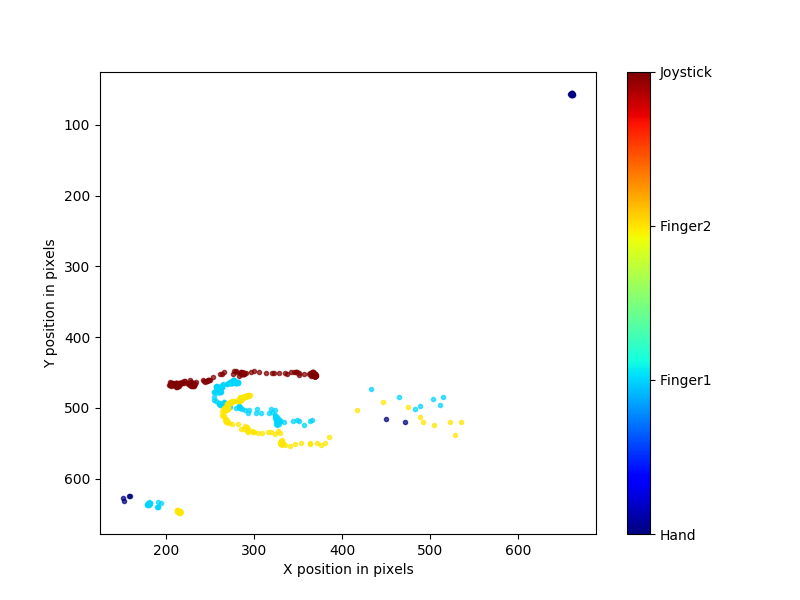

<IPython.core.display.Javascript object>


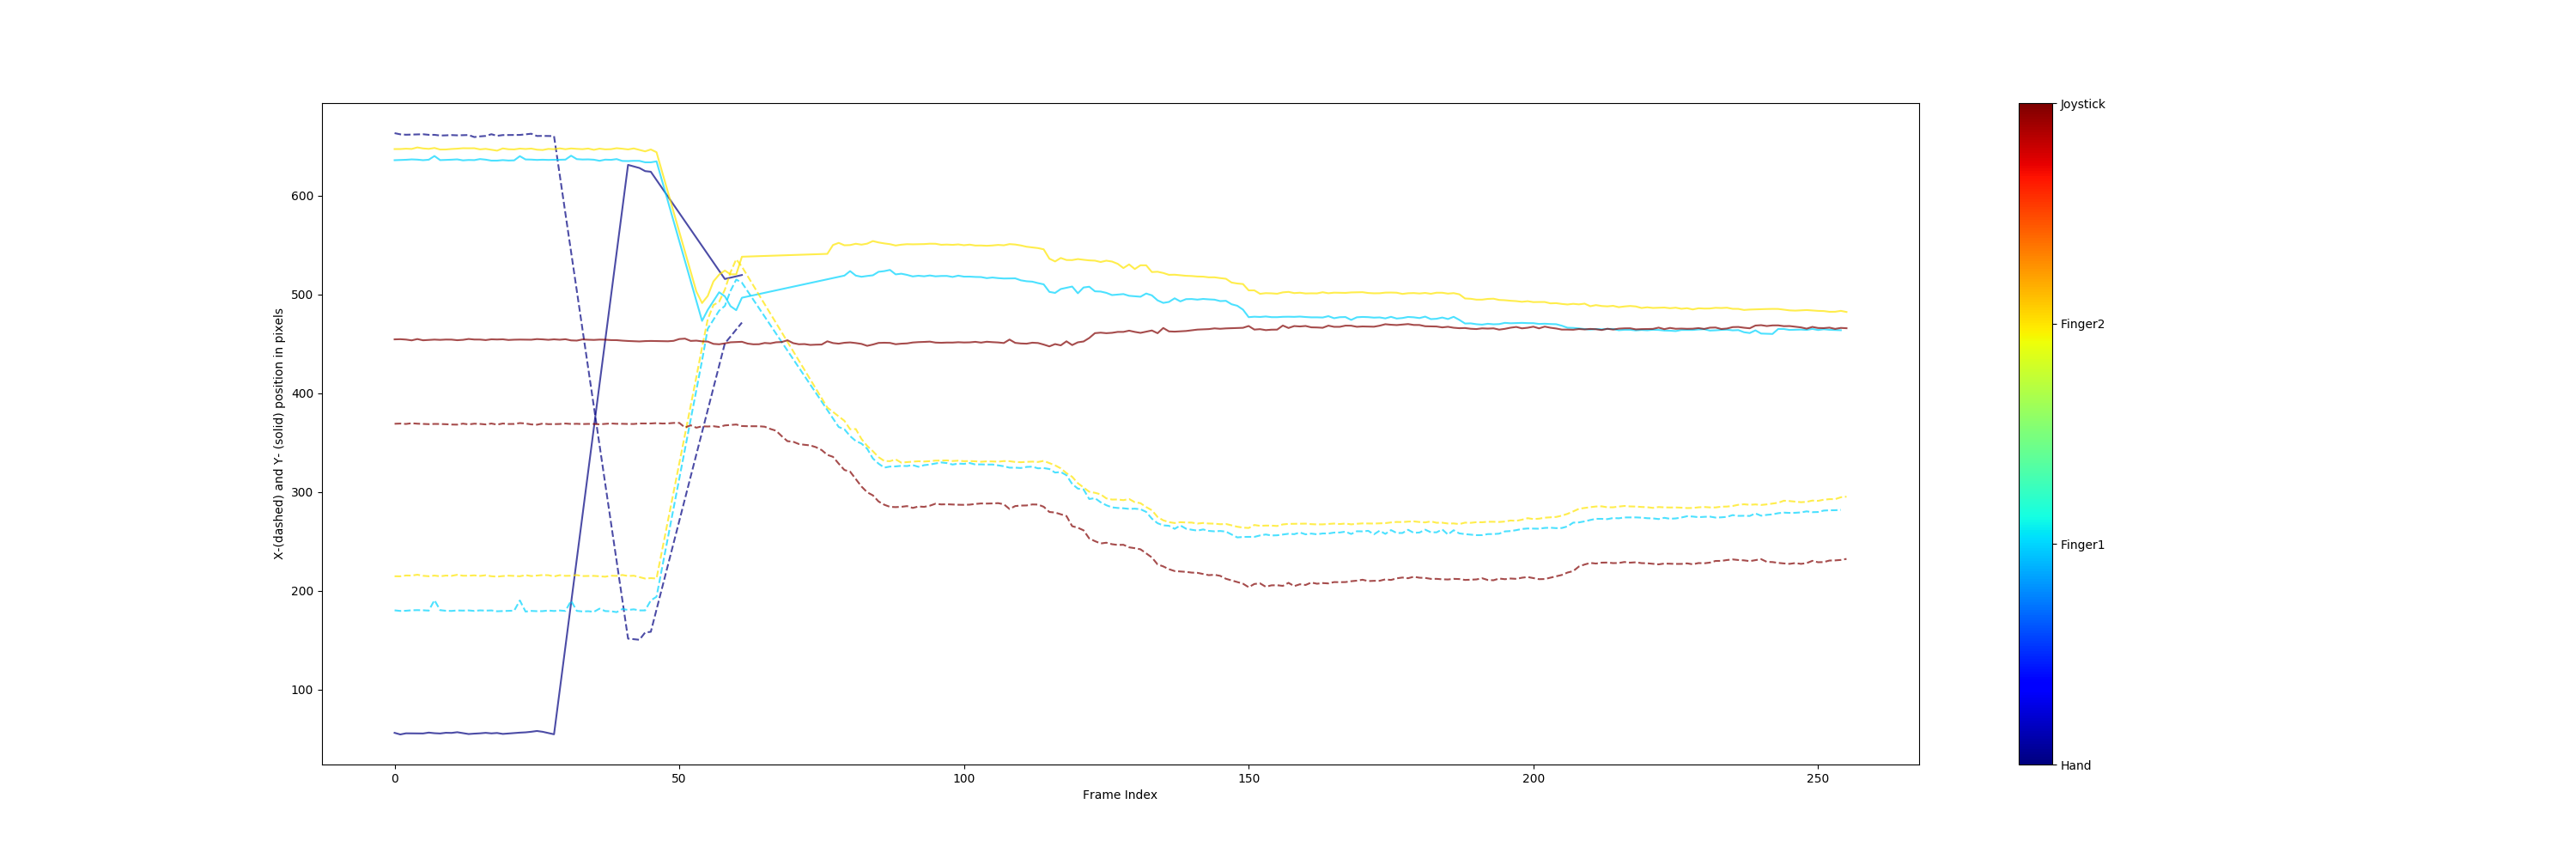

<IPython.core.display.Javascript object>


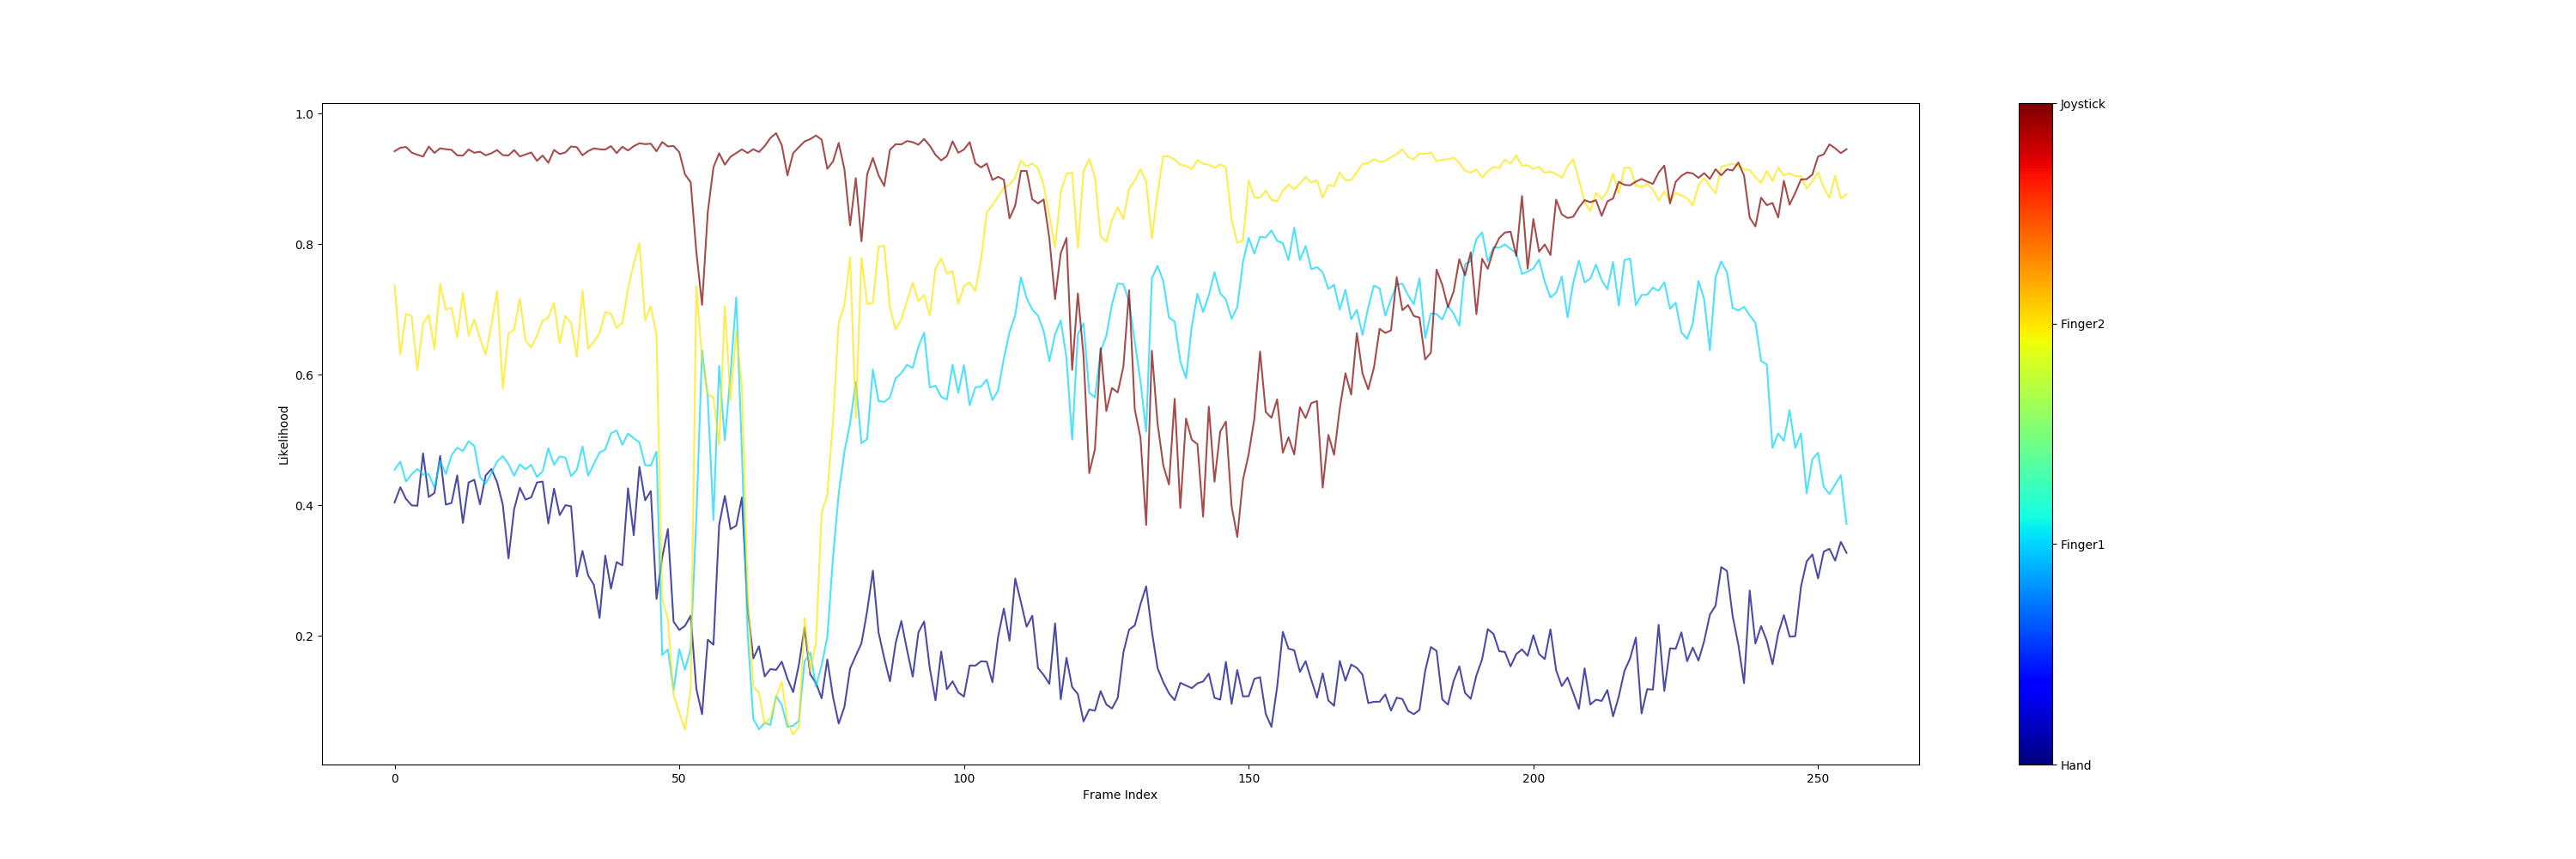

<IPython.core.display.Javascript object>


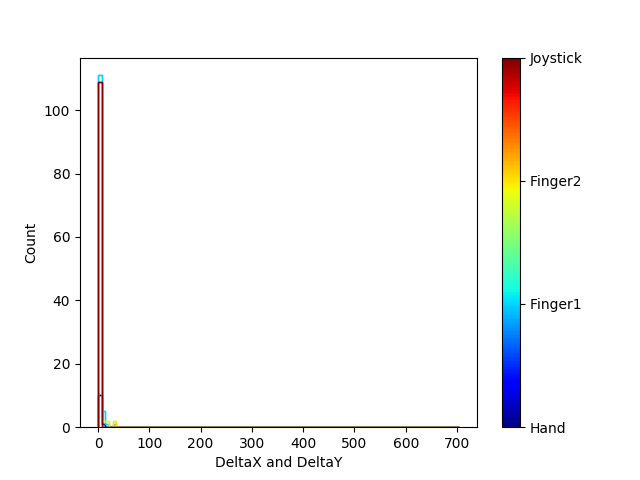

Plots created! Please check the directory "plot-poses" within the video directory


In [10]:
%matplotlib notebook
deeplabcut.plot_trajectories(path_config_file,videofile_path,showfigures=True)

#These plots can are interactive and can be customized (see https://matplotlib.org/)

## Extract outlier frames, where the predictions are off.

This is optional step allows to add more training data when the evaluation results are poor. In such a case, the user can use the following function to extract frames where the labels are incorrectly predicted. Make sure to provide the correct value of the "iterations" as it will be used to create the unique directory where the extracted frames will be saved.

network parameters: DeepCut_resnet50_ReachingAug30shuffle1_1200
Method  uncertain  found  161  putative outlier frames.
Do you want to proceed with extracting  20  of those?
If this list is very large, perhaps consider changing the paramters (start, stop, p_bound, comparisonbodyparts) or use a different method.
yes/noyes


5it [00:00, 43.87it/s]

Loading video...
Duration of video [s]:  8.533333333333333 , recorded @  30.0 fps!
Overall # of frames:  256 with (cropped) frame dimensions: 
Kmeans-quantization based extracting of frames from 0.0  seconds to 8.53  seconds.
Extracting and downsampling... 161  frames from the video.


161it [00:03, 45.72it/s]


Kmeans clustering ... (this might take a while)
Let's select frames indices: [139, 86, 75, 225, 154, 55, 118, 174, 216, 81, 194, 50, 189, 95, 242, 47, 164, 114, 124, 202]


<IPython.core.display.Javascript object>


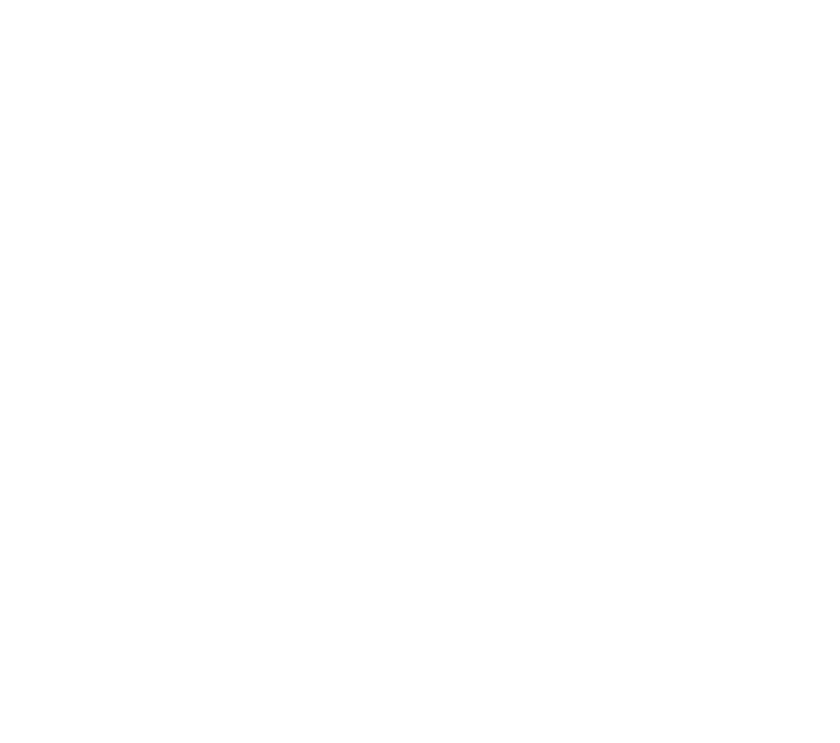

<IPython.core.display.Javascript object>


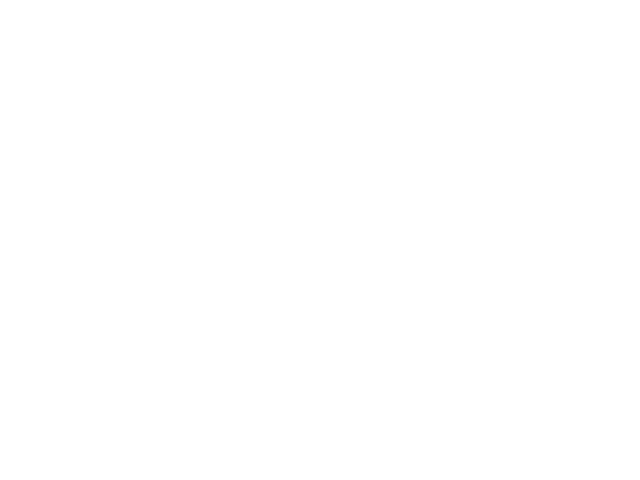

<IPython.core.display.Javascript object>


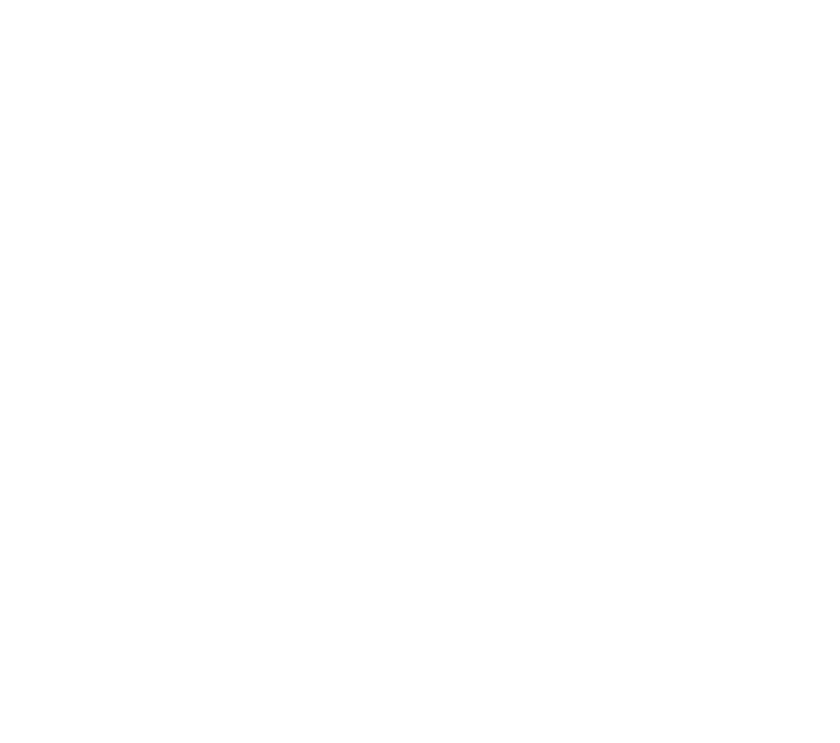

<IPython.core.display.Javascript object>


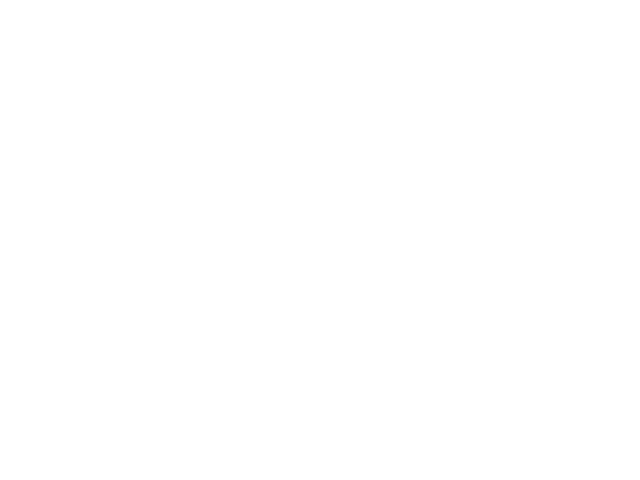

<IPython.core.display.Javascript object>


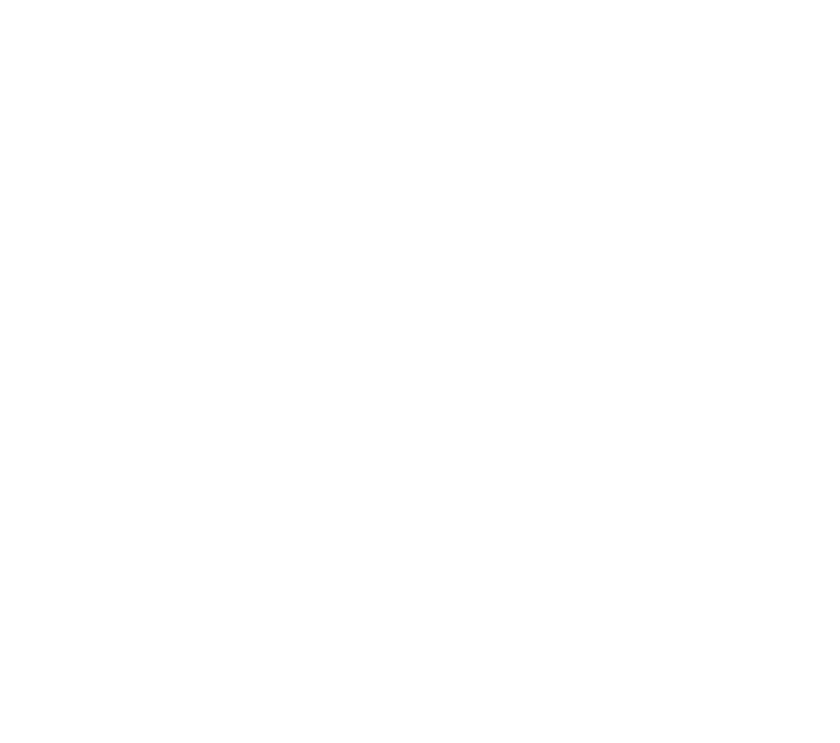

<IPython.core.display.Javascript object>


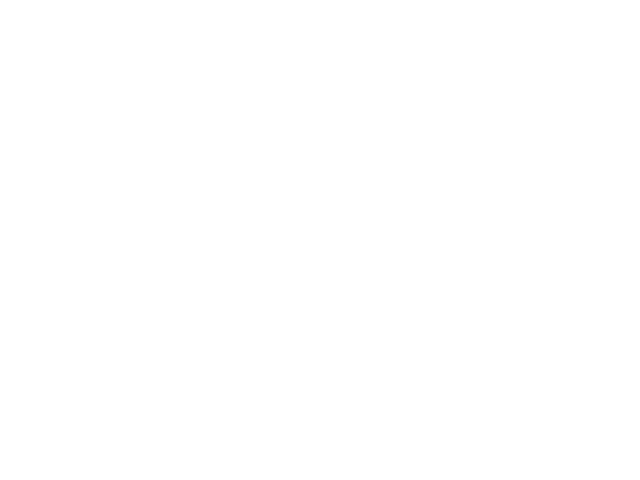

<IPython.core.display.Javascript object>


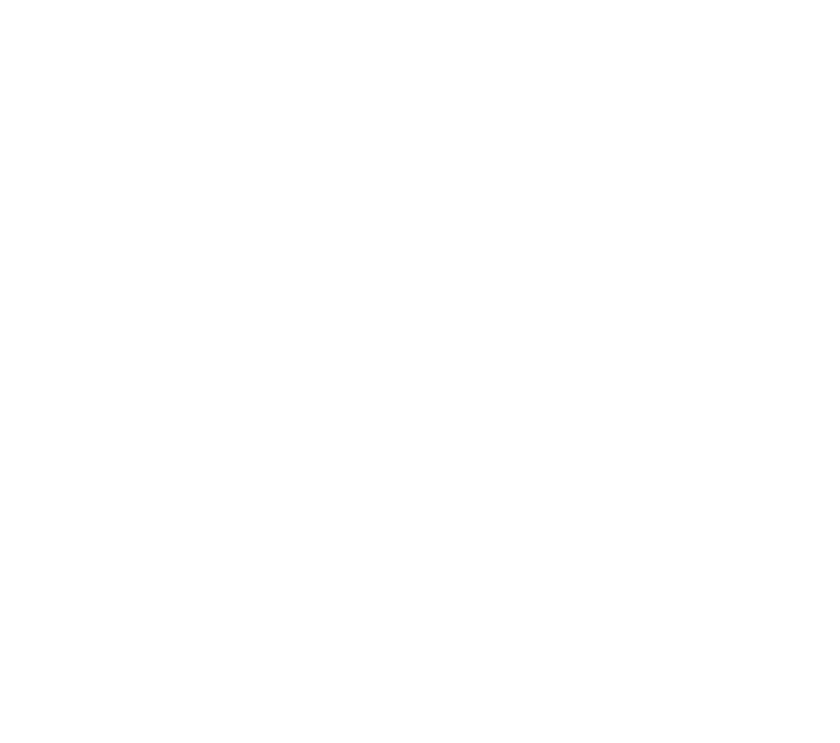

<IPython.core.display.Javascript object>


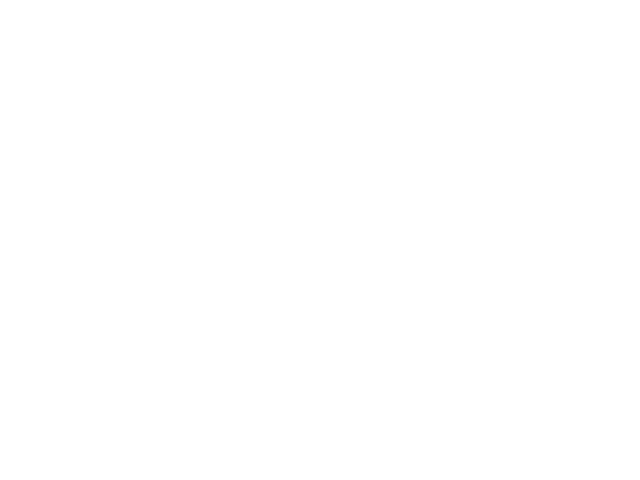

<IPython.core.display.Javascript object>


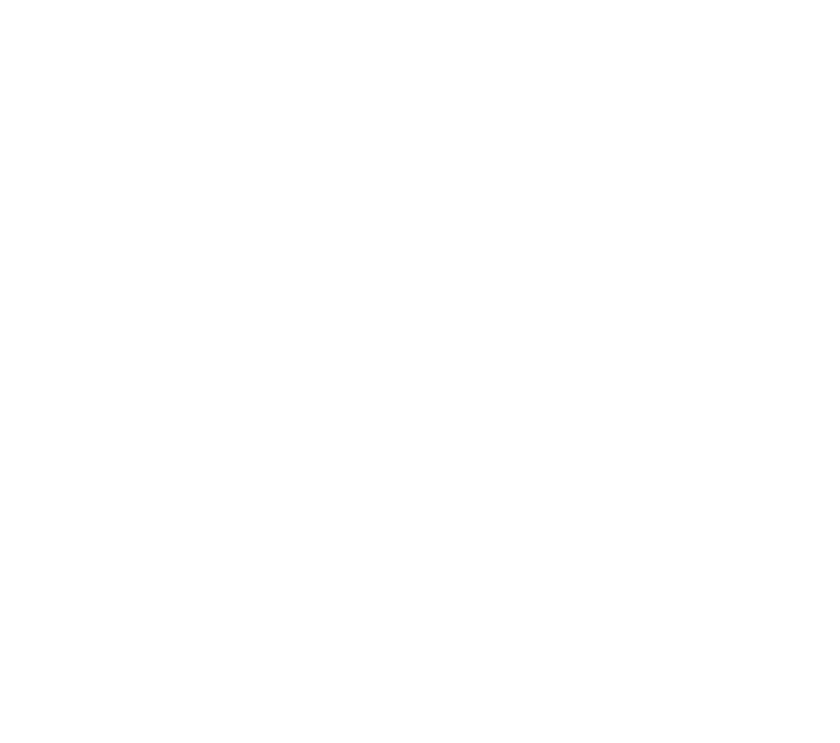

<IPython.core.display.Javascript object>


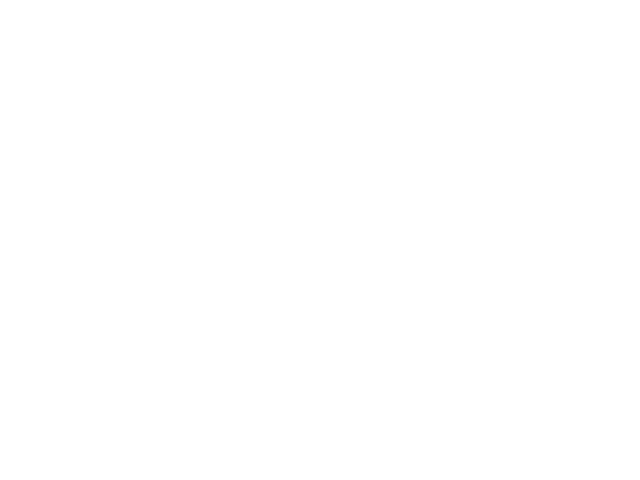

<IPython.core.display.Javascript object>


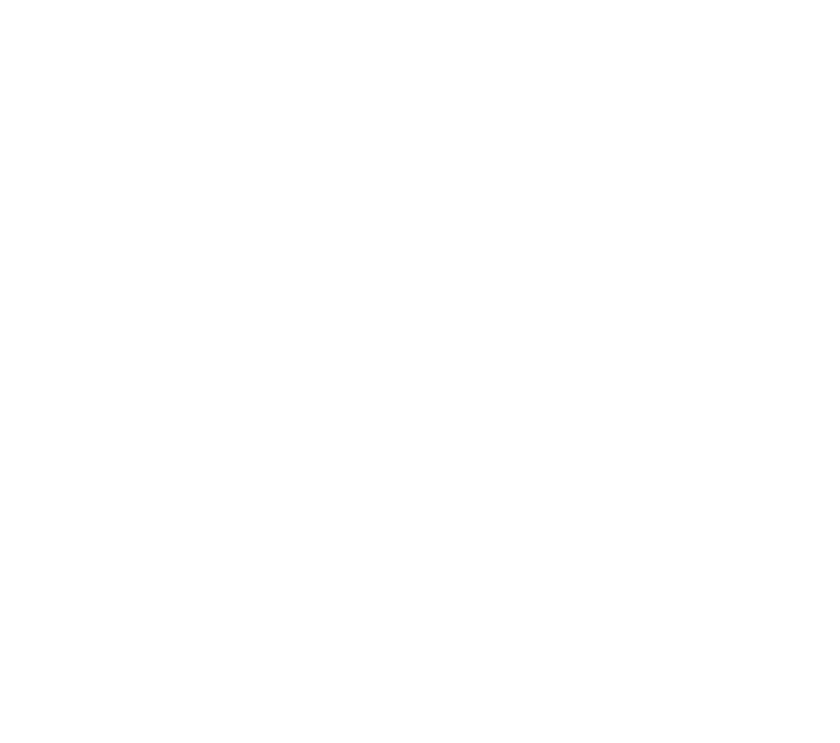

<IPython.core.display.Javascript object>


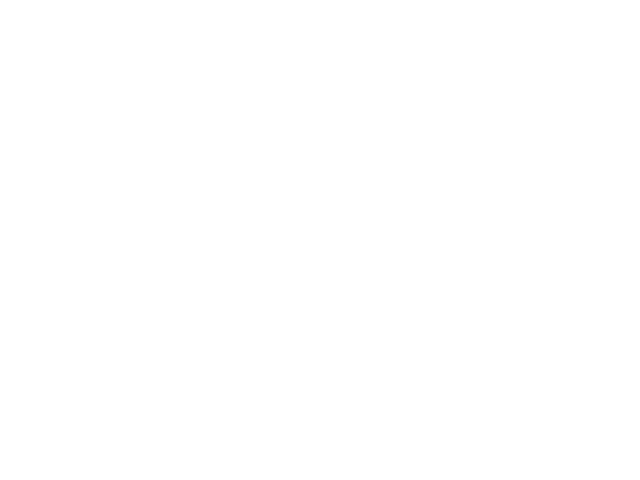

<IPython.core.display.Javascript object>


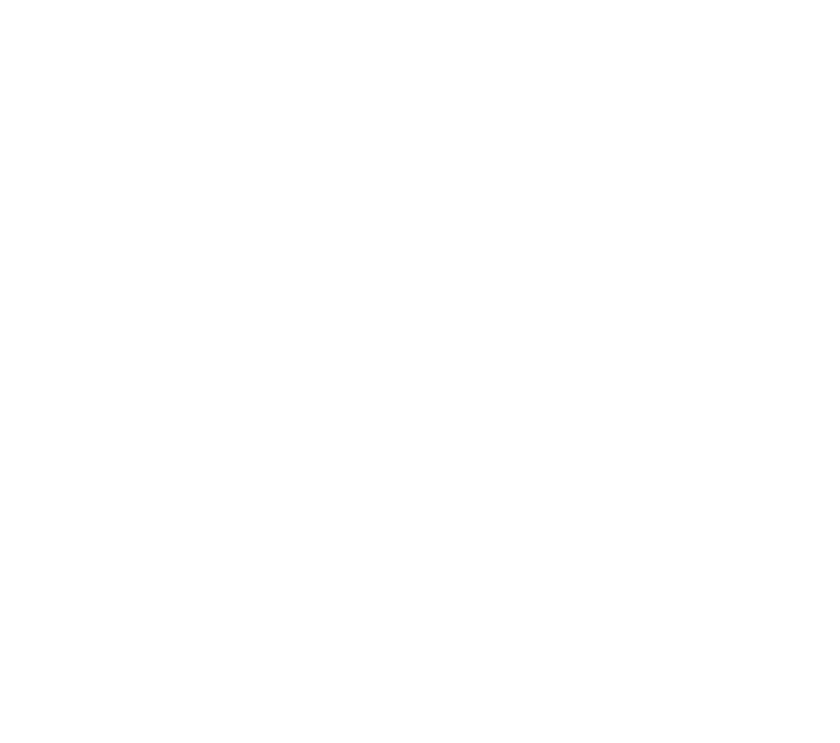

<IPython.core.display.Javascript object>


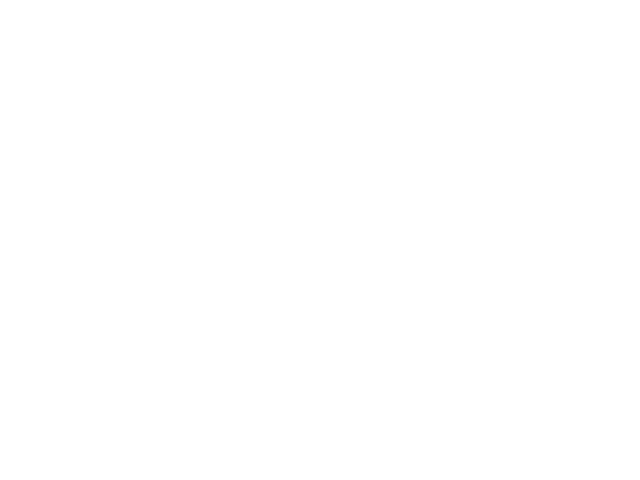

<IPython.core.display.Javascript object>


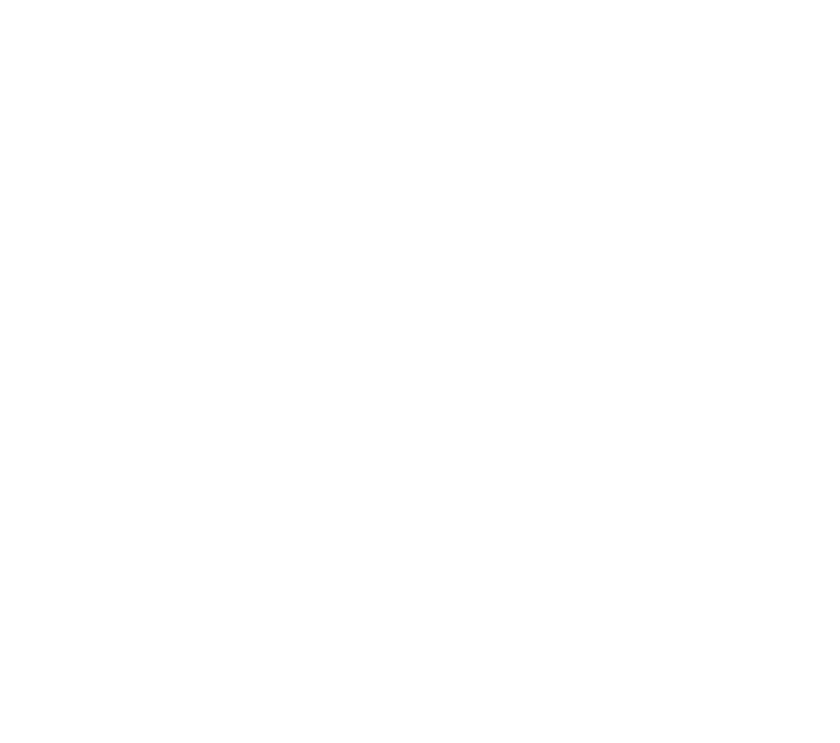

<IPython.core.display.Javascript object>


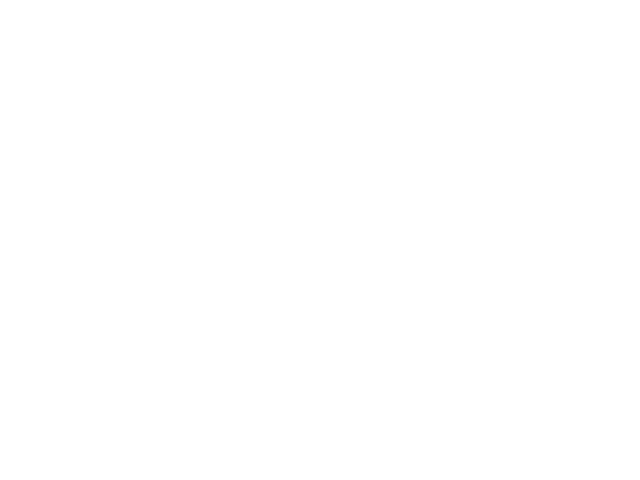

<IPython.core.display.Javascript object>


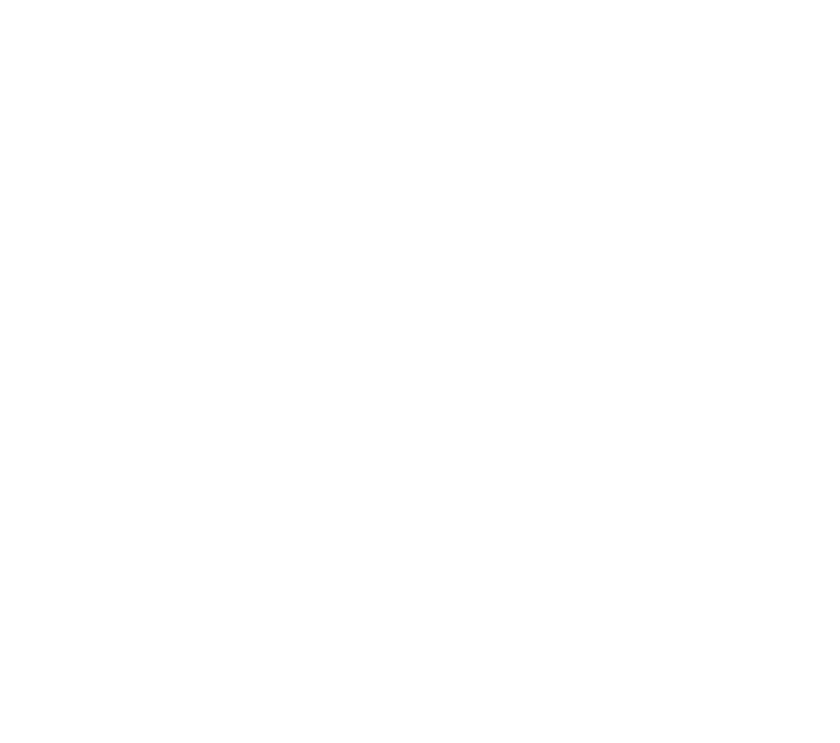

<IPython.core.display.Javascript object>


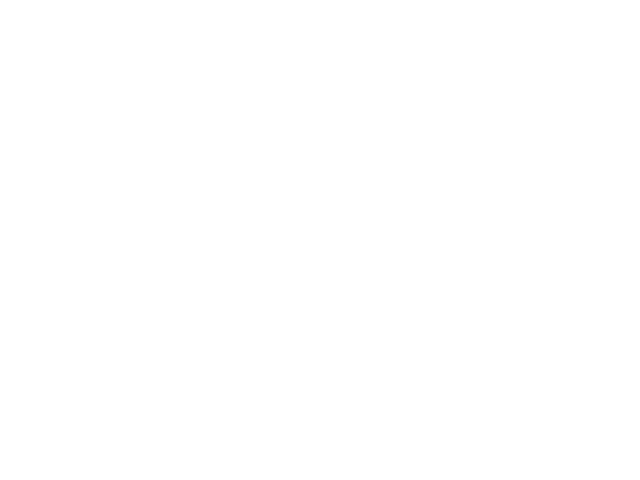

<IPython.core.display.Javascript object>


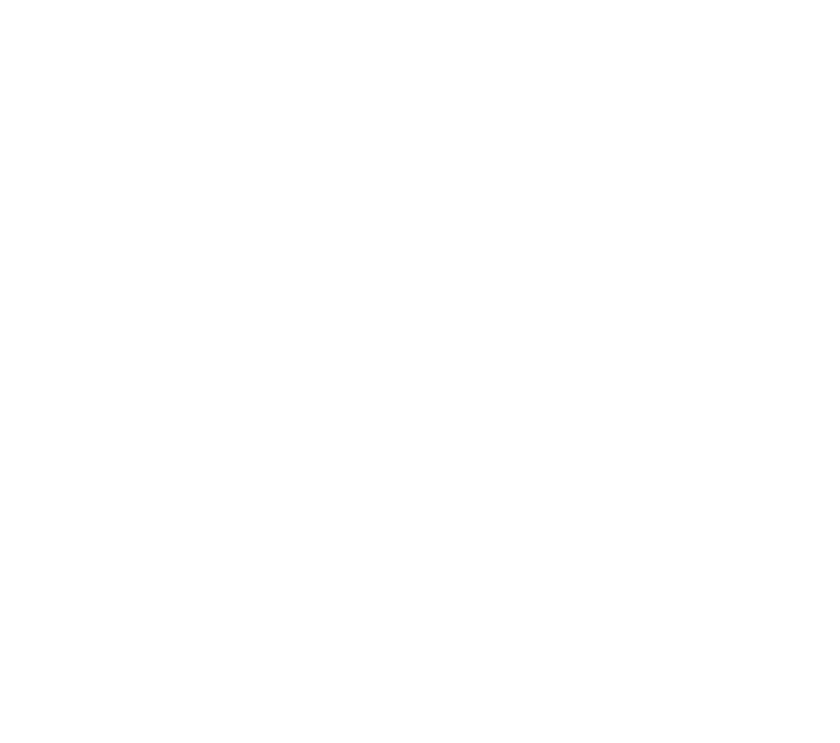

<IPython.core.display.Javascript object>


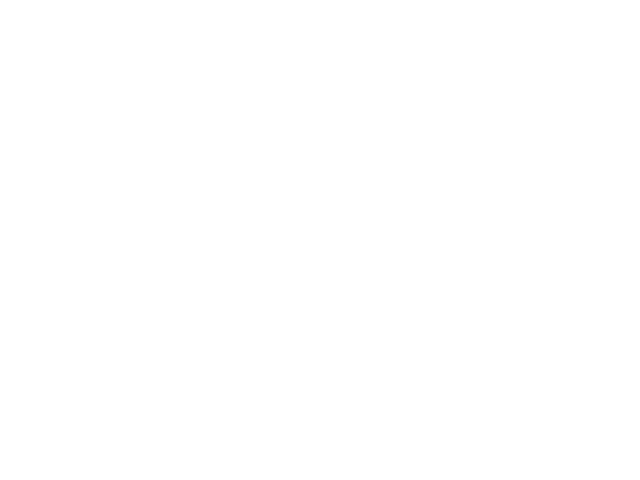

<IPython.core.display.Javascript object>


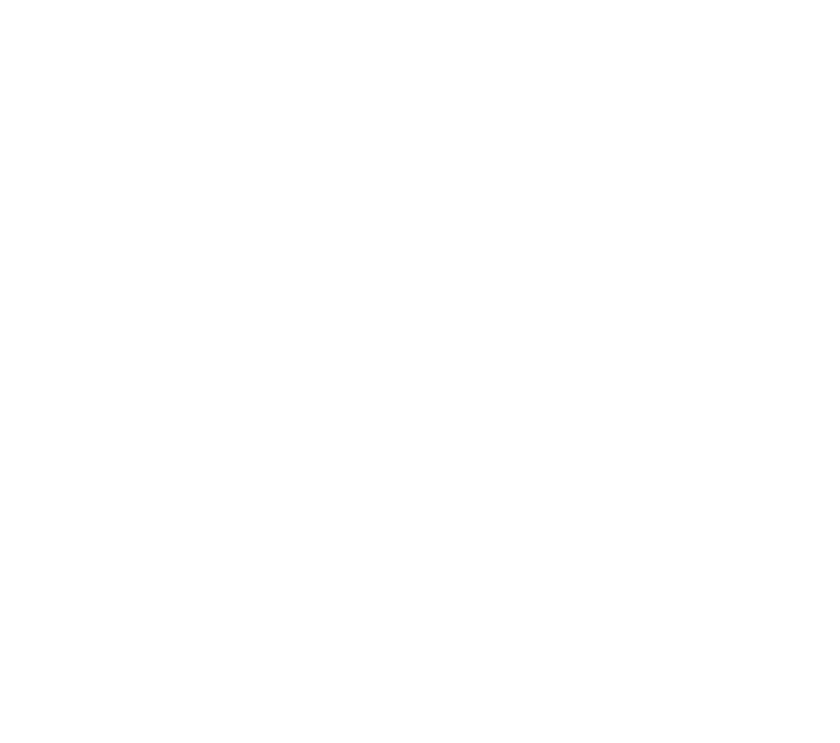

<IPython.core.display.Javascript object>


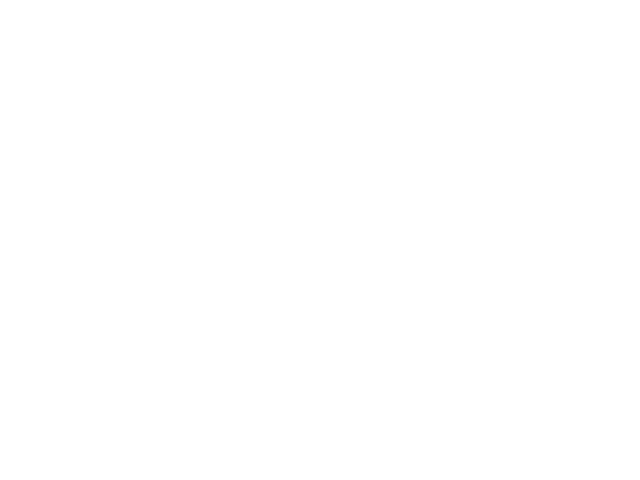

<IPython.core.display.Javascript object>


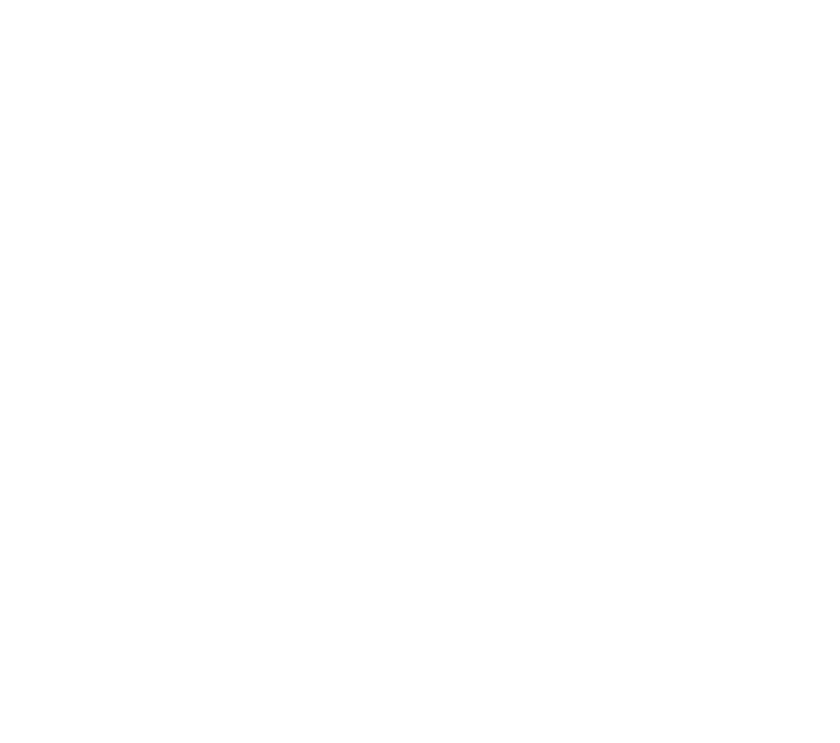

<IPython.core.display.Javascript object>


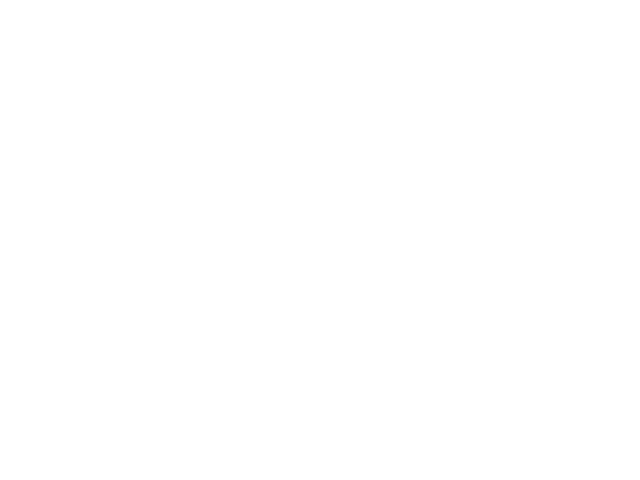

<IPython.core.display.Javascript object>


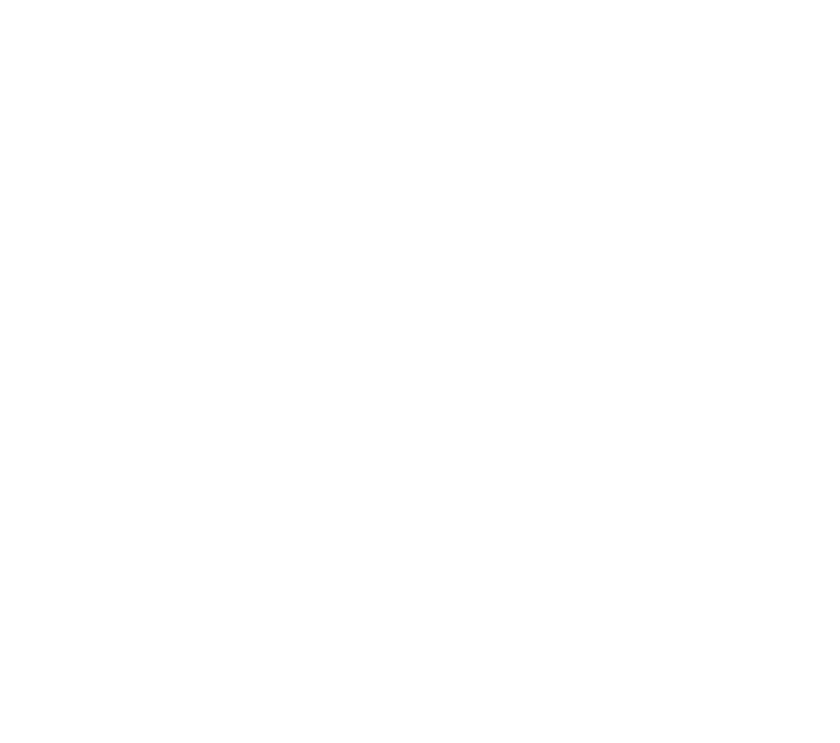

<IPython.core.display.Javascript object>


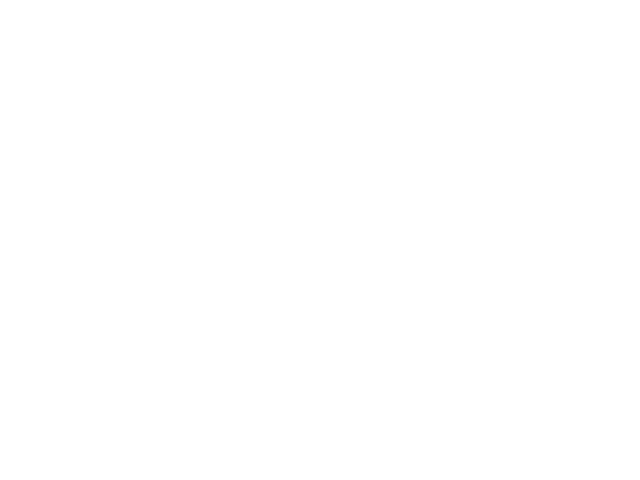

<IPython.core.display.Javascript object>


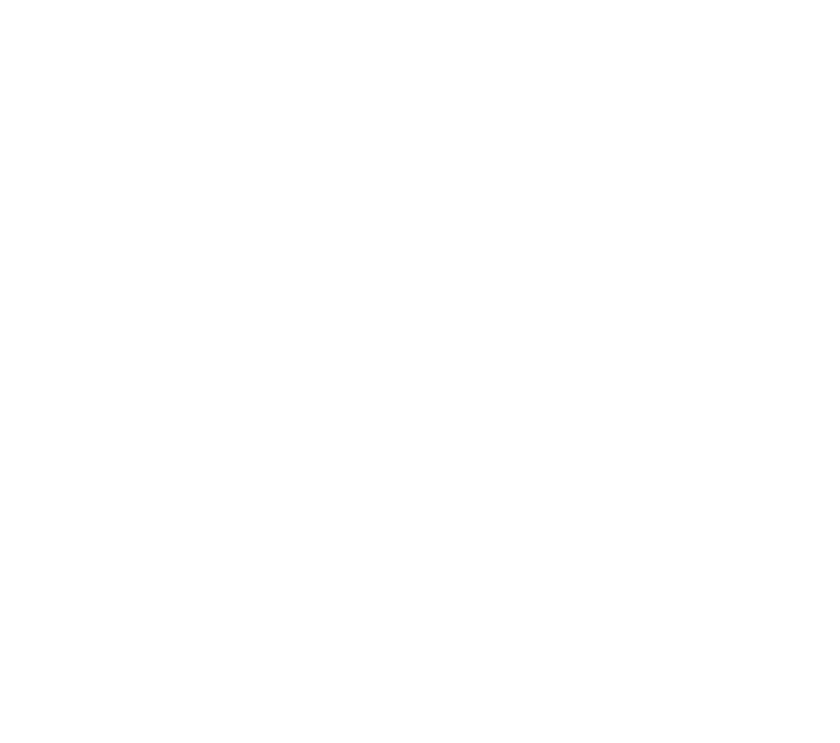

<IPython.core.display.Javascript object>


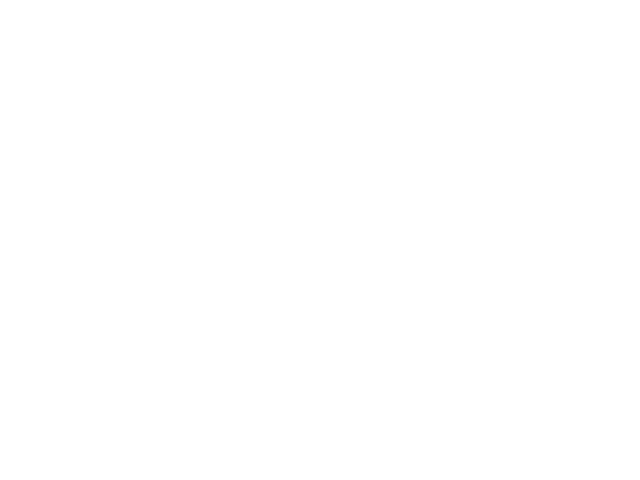

<IPython.core.display.Javascript object>


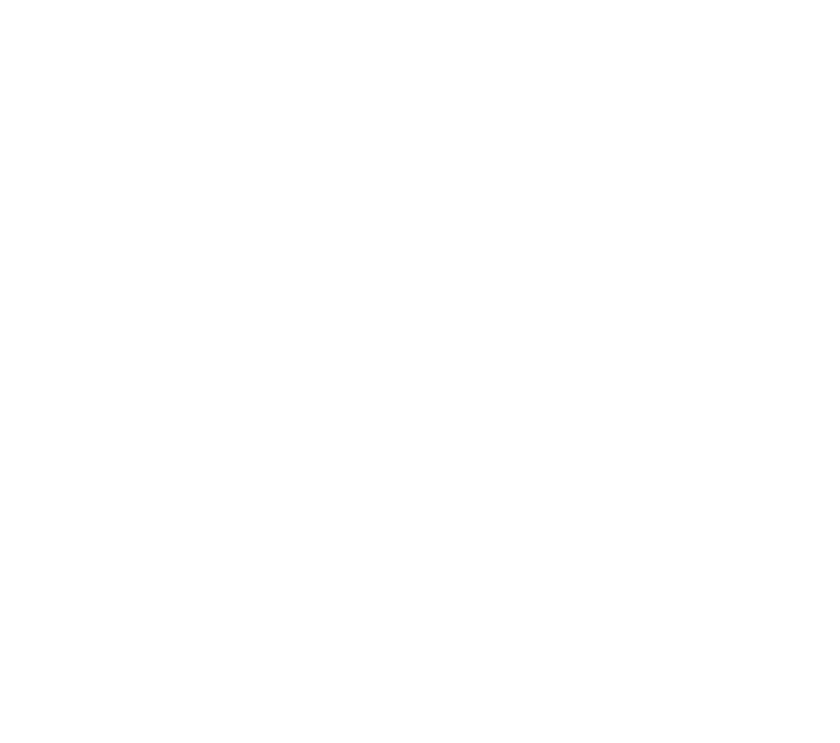

<IPython.core.display.Javascript object>


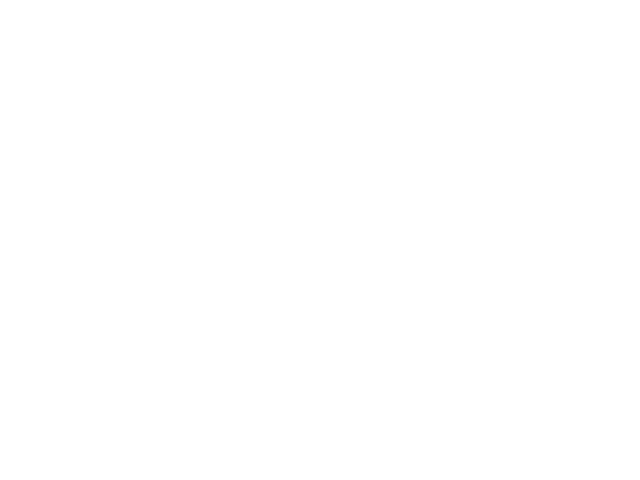

<IPython.core.display.Javascript object>


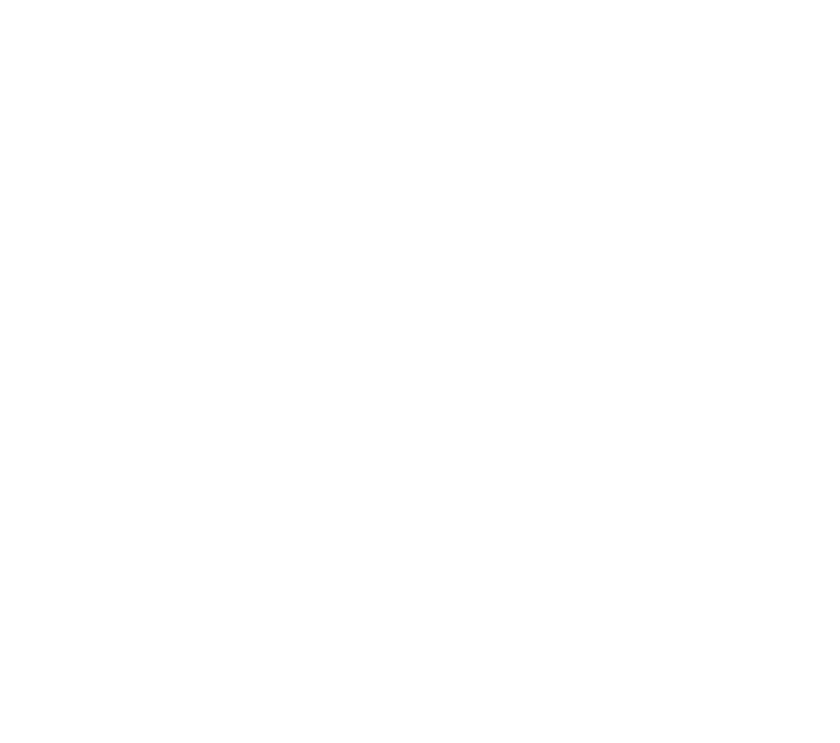

<IPython.core.display.Javascript object>


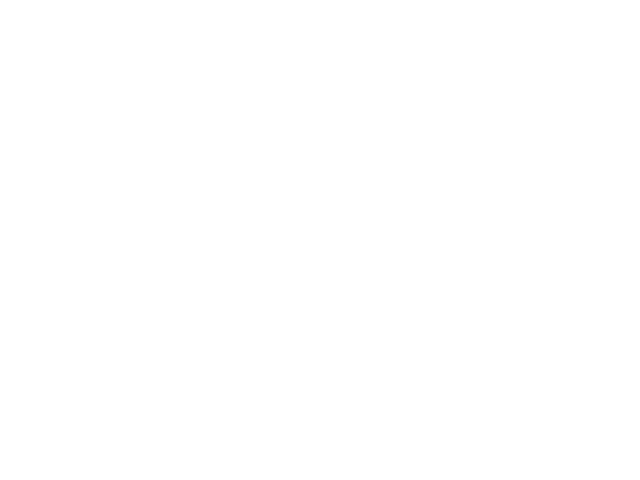

<IPython.core.display.Javascript object>


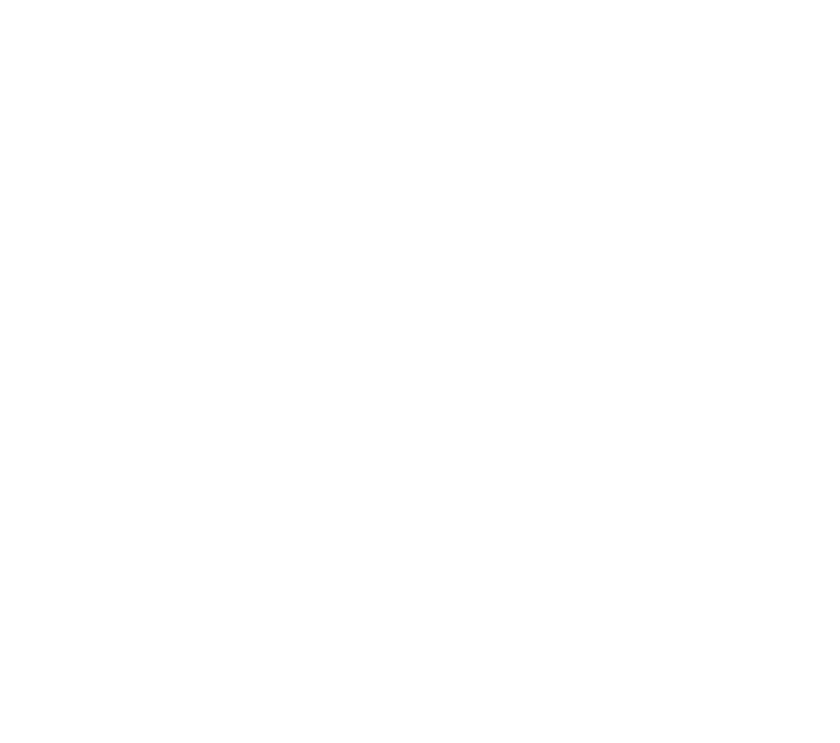

<IPython.core.display.Javascript object>


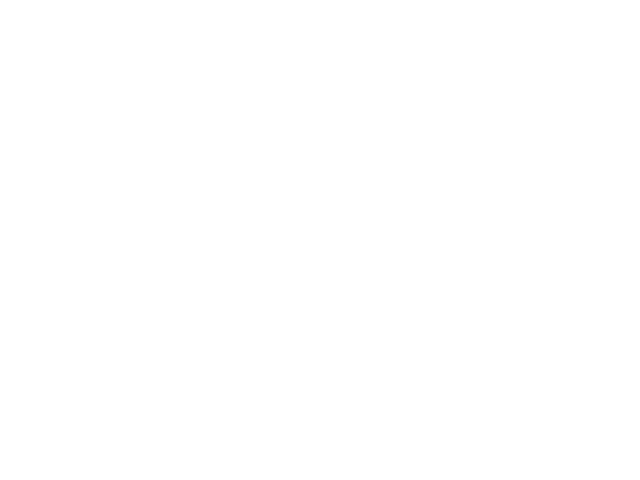

<IPython.core.display.Javascript object>


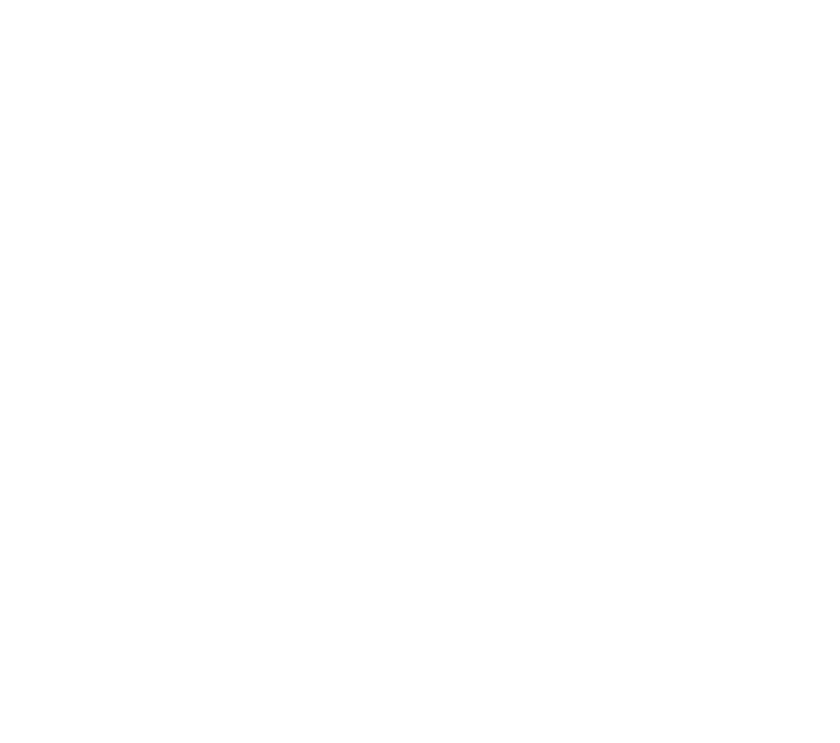

<IPython.core.display.Javascript object>


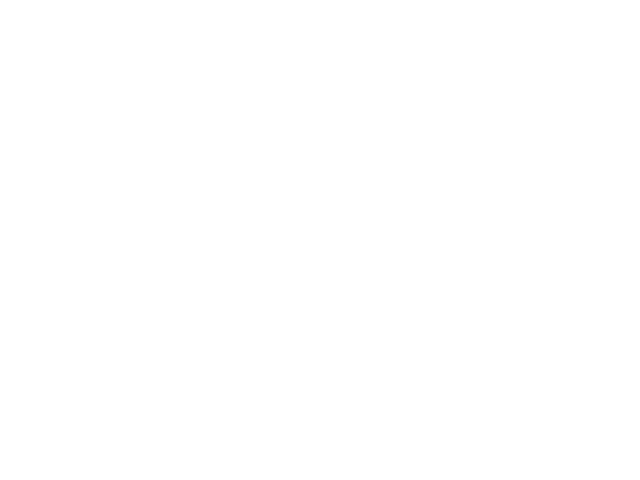

<IPython.core.display.Javascript object>


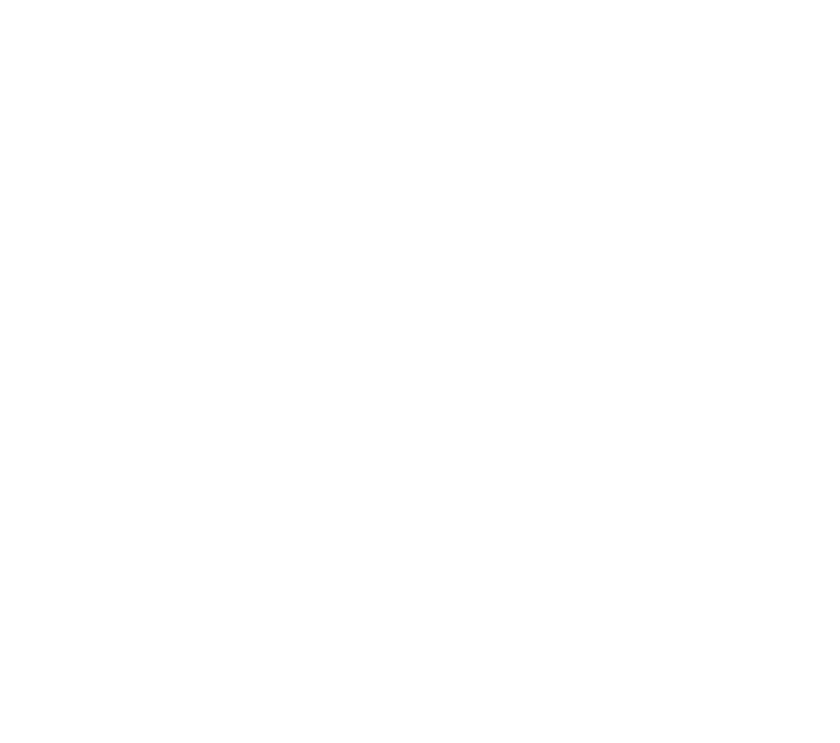

<IPython.core.display.Javascript object>


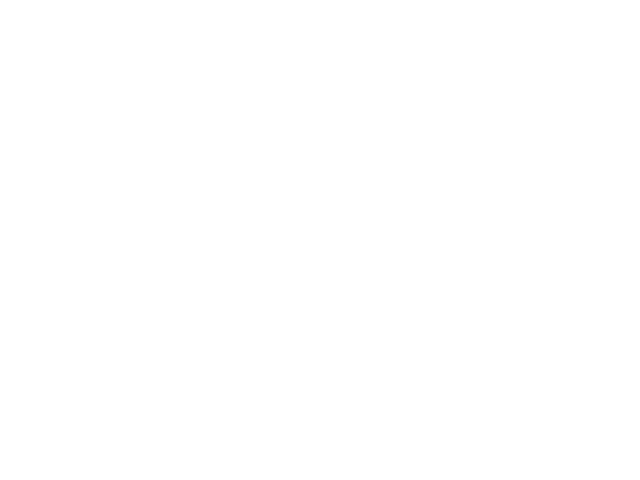

<IPython.core.display.Javascript object>


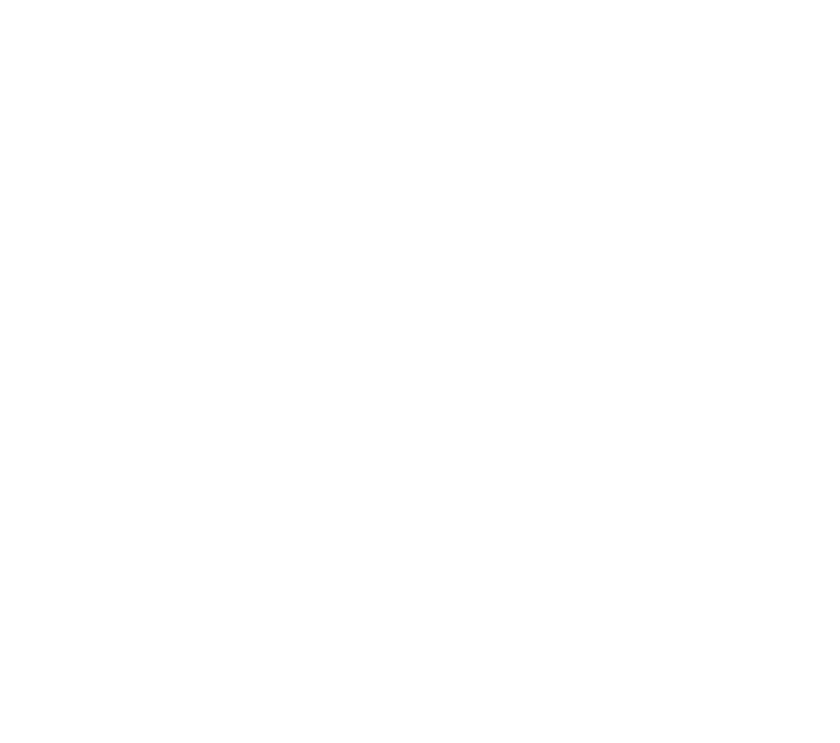

New video was added to the project! Use the function 'extract_frames' to select frames for labeling.
The outlier frames are extracted. They are stored in the subdirectory labeled-data\MovieS2_Perturbation_noLaser_compressed.
Once you extracted frames for all videos, use 'refine_labels' to manually correct the labels.


In [11]:
deeplabcut.extract_outlier_frames(path_config_file,videofile_path,outlieralgorithm='uncertain',p_bound=.2)

In [ ]:
# Note, if you have questions on parameters, remember "?" gives you answers:
# i.e. deeplabcut.extract_outlier_frames?

The user can run this iteratively, and (even) extract additional frames from the same video.

## Manually correct labels

This step allows the user to correct the labels in the extracted frames. Navigate to the folder corresponding to the video 'MovieS2_Perturbation_noLaser_compressed' and use the GUI as described in the protocol to update the labels.

In [12]:
#GUI pops up! 

%gui wx
deeplabcut.refine_labels(path_config_file)

Linux
Checking labels if they are outside the image
Closing... The refined labels are stored in a subdirectory under labeled-data. Use the function 'merge_datasets' to augment the training dataset, and then re-train a network using create_training_dataset followed by train_network!


In [13]:
# Now merge datasets (once you refined all frames)
deeplabcut.merge_datasets(path_config_file)

Merged data sets and updated refinement iteration to 1.
Now you can create a new training set for the expanded annotated images (use create_training_dataset).


## Create a new iteration of training dataset, check it and train...

Following the refine labels, append these frames to the original dataset to create a new iteration of training dataset.

Creating images with labels by Mackenzie.
/home/braincreator/Pose_estimation/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/labeled-data/reachingvideo1_labeled  already exists!


<IPython.core.display.Javascript object>


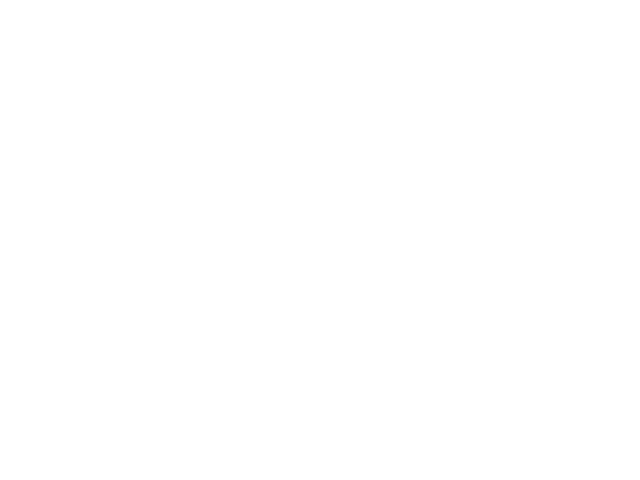

<IPython.core.display.Javascript object>


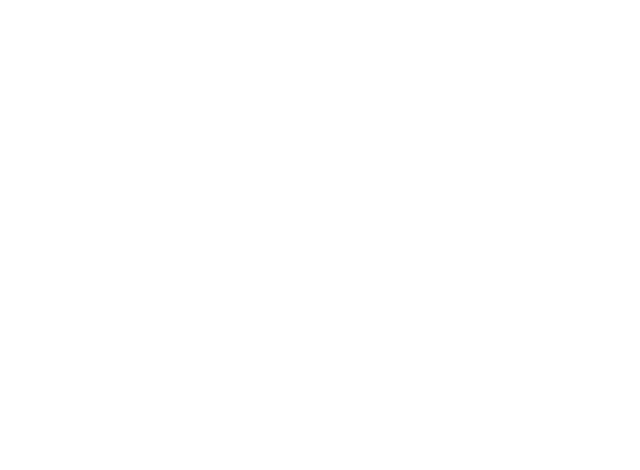

They are stored in the following folder: /home/braincreator/Pose_estimation/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/labeled-data/reachingvideo1_labeled.


<IPython.core.display.Javascript object>


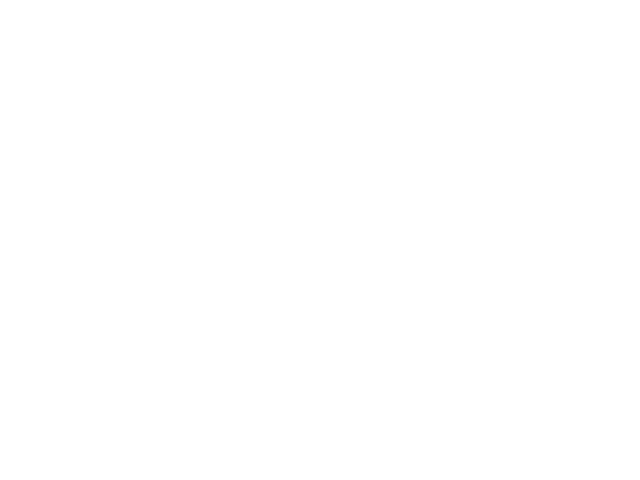

<IPython.core.display.Javascript object>


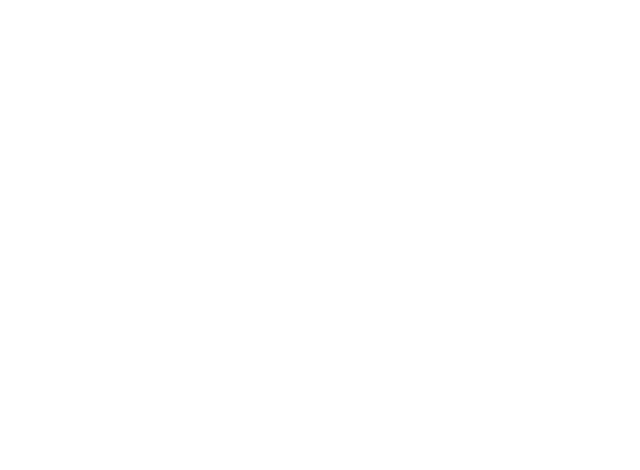

<IPython.core.display.Javascript object>


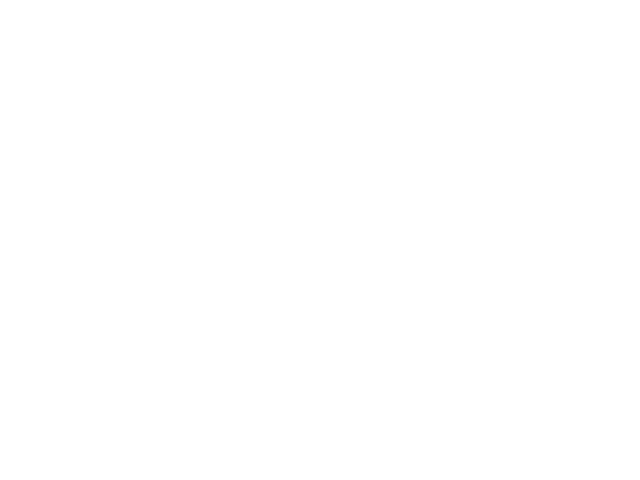

<IPython.core.display.Javascript object>


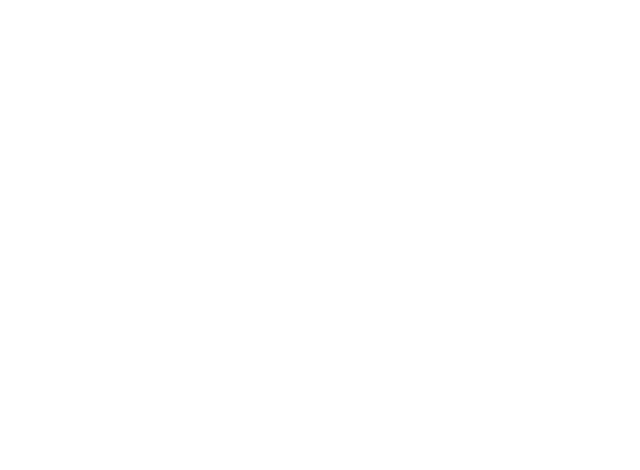

<IPython.core.display.Javascript object>


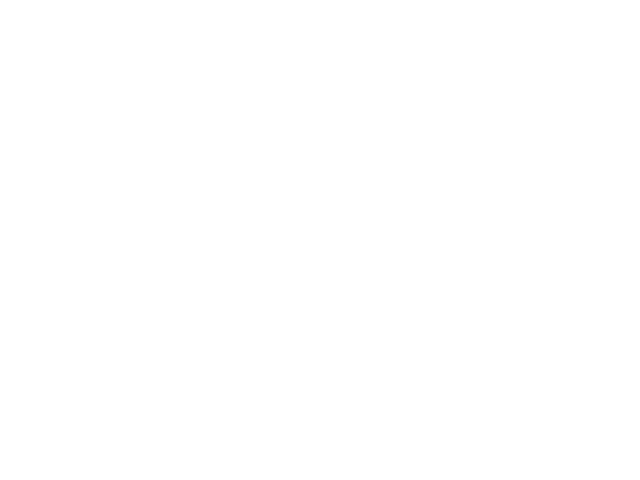

<IPython.core.display.Javascript object>


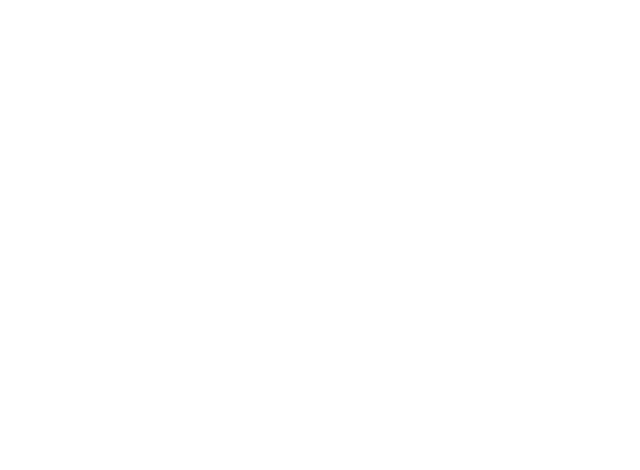

<IPython.core.display.Javascript object>


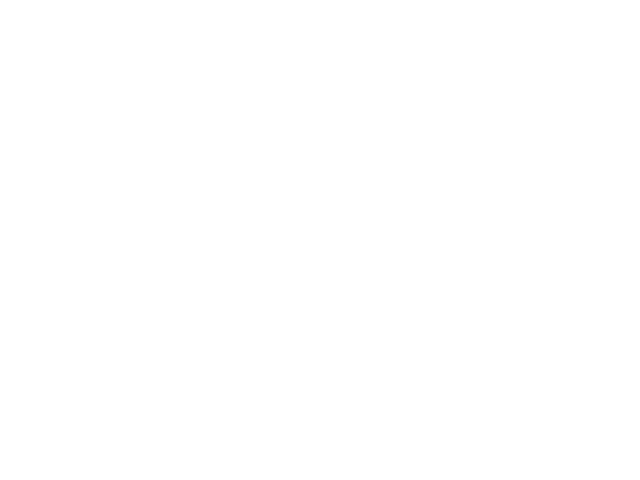

<IPython.core.display.Javascript object>


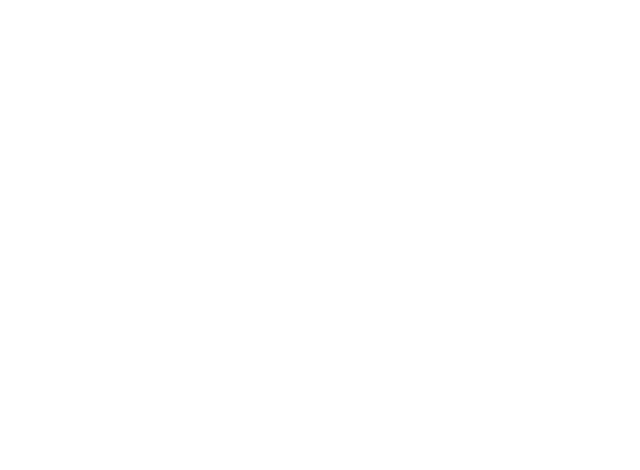

<IPython.core.display.Javascript object>


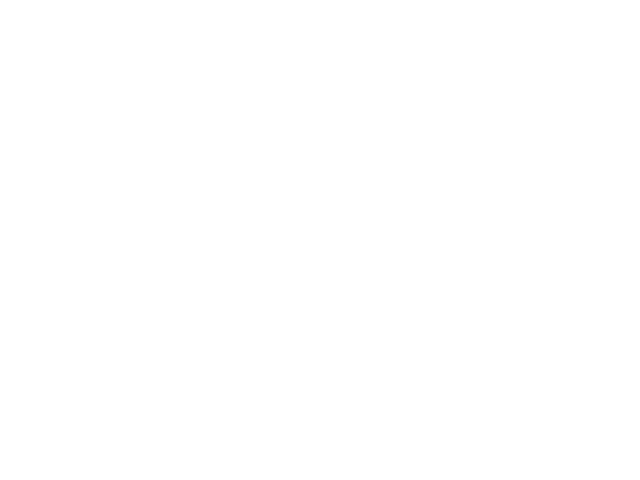

<IPython.core.display.Javascript object>


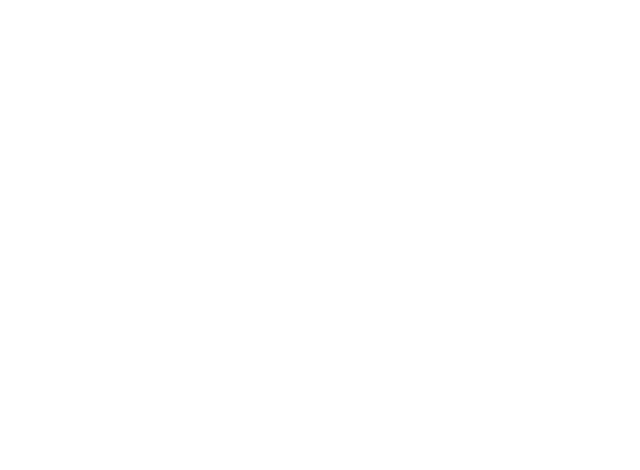

<IPython.core.display.Javascript object>


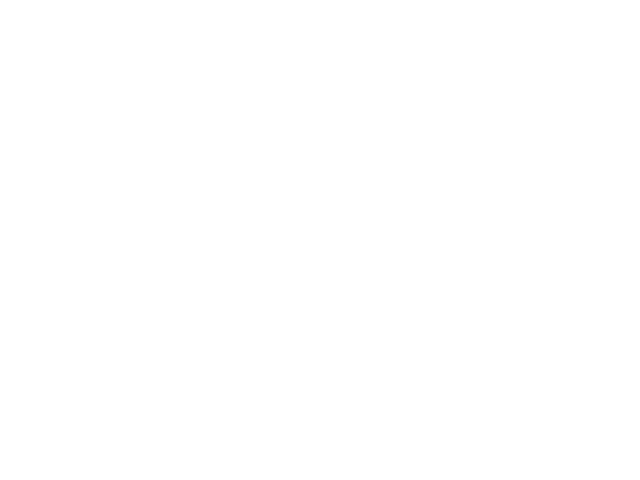

<IPython.core.display.Javascript object>


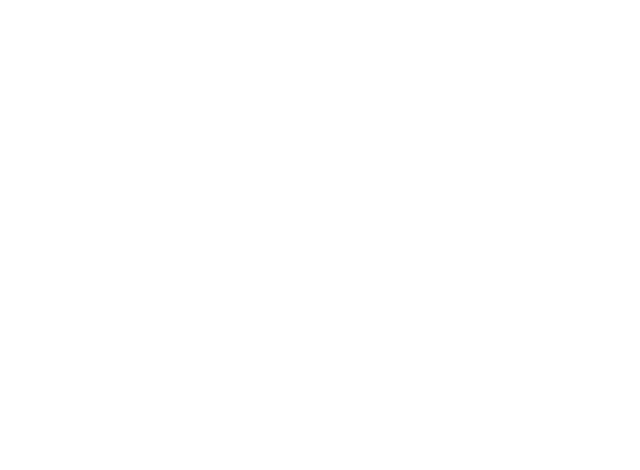

<IPython.core.display.Javascript object>


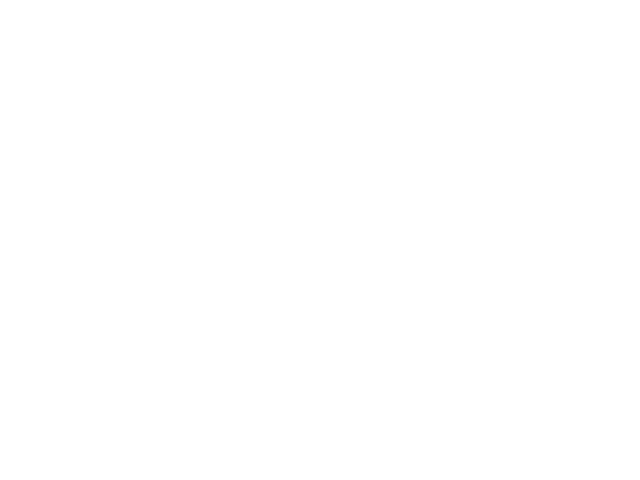

<IPython.core.display.Javascript object>


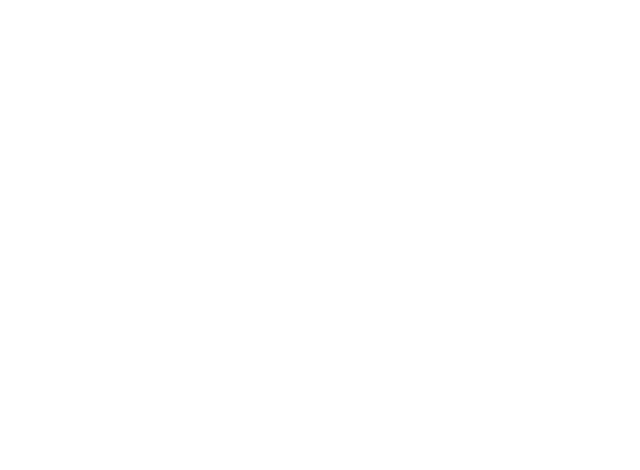

<IPython.core.display.Javascript object>


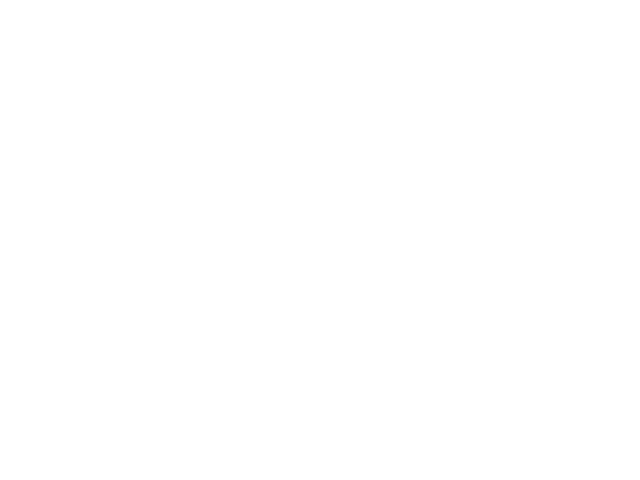

<IPython.core.display.Javascript object>


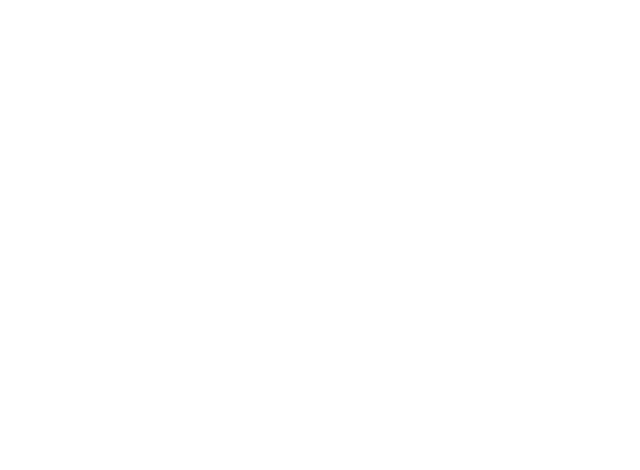

<IPython.core.display.Javascript object>


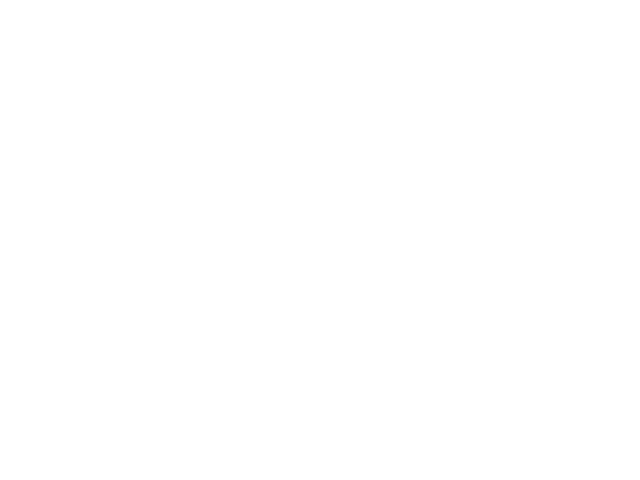

<IPython.core.display.Javascript object>


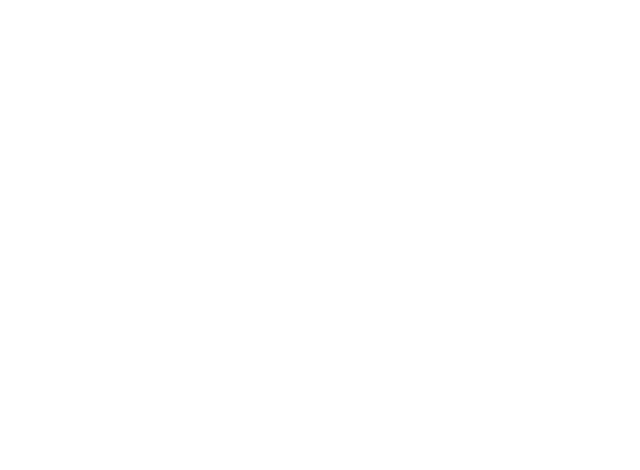

<IPython.core.display.Javascript object>


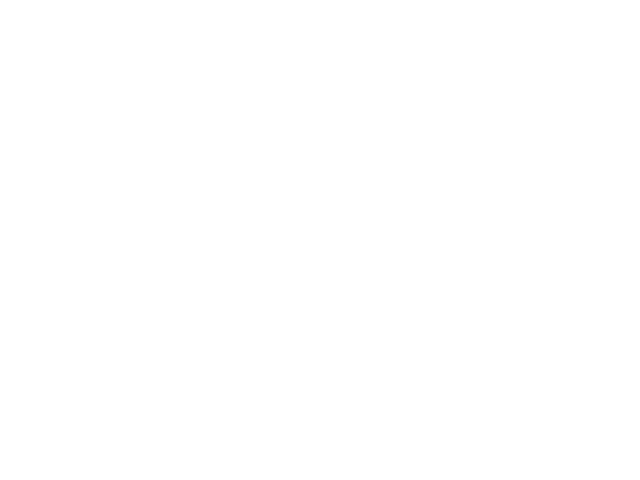

<IPython.core.display.Javascript object>


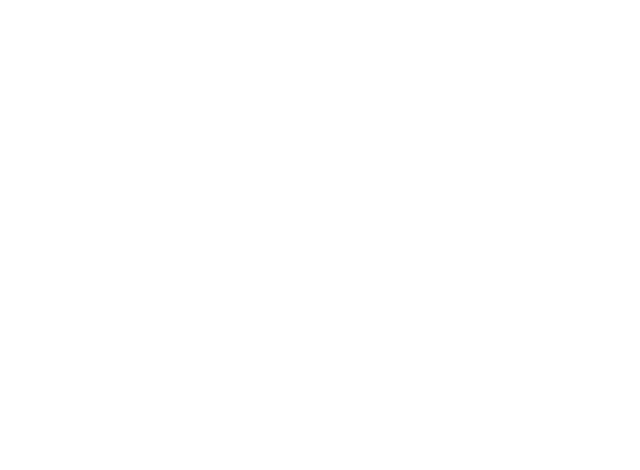

<IPython.core.display.Javascript object>


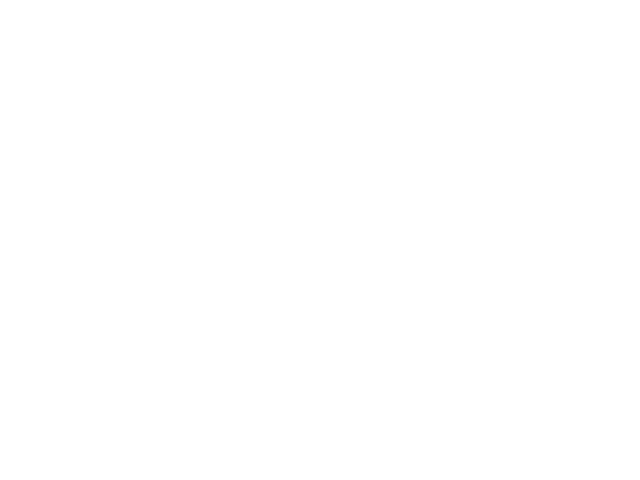

<IPython.core.display.Javascript object>


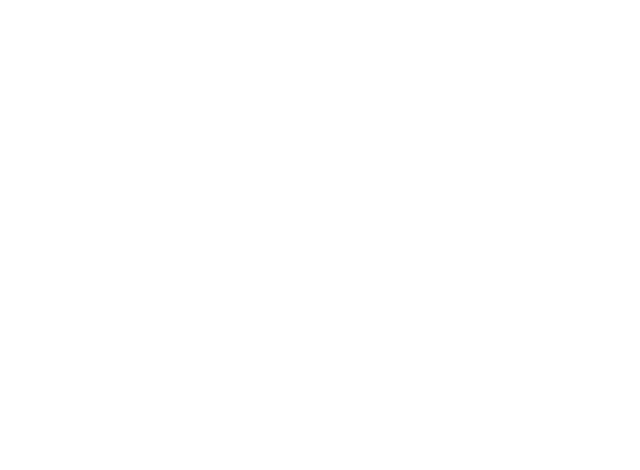

<IPython.core.display.Javascript object>


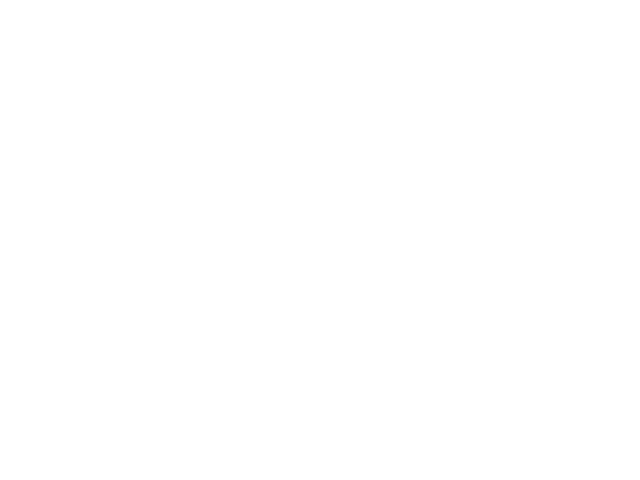

<IPython.core.display.Javascript object>


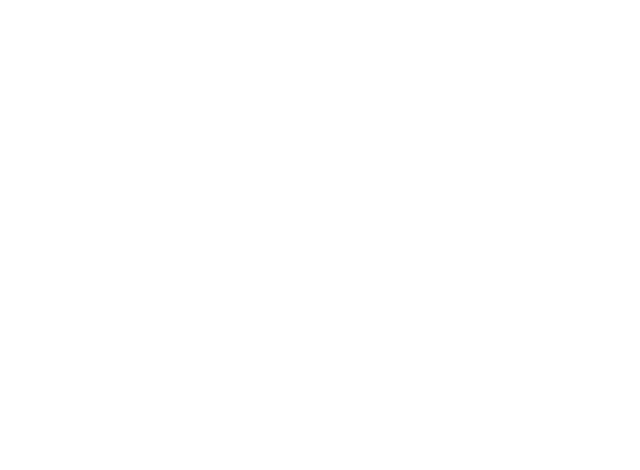

<IPython.core.display.Javascript object>


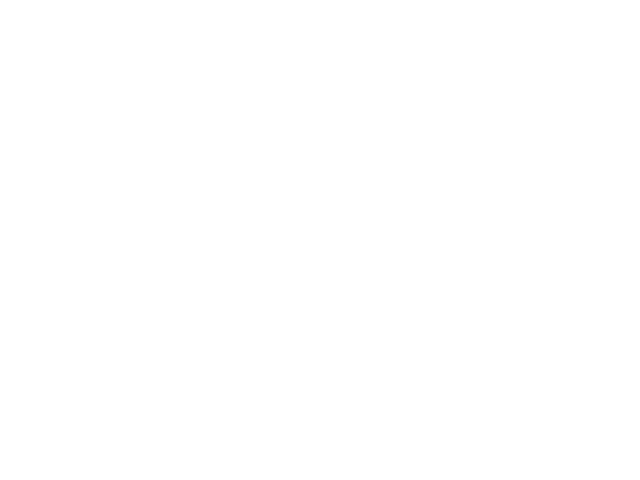

<IPython.core.display.Javascript object>


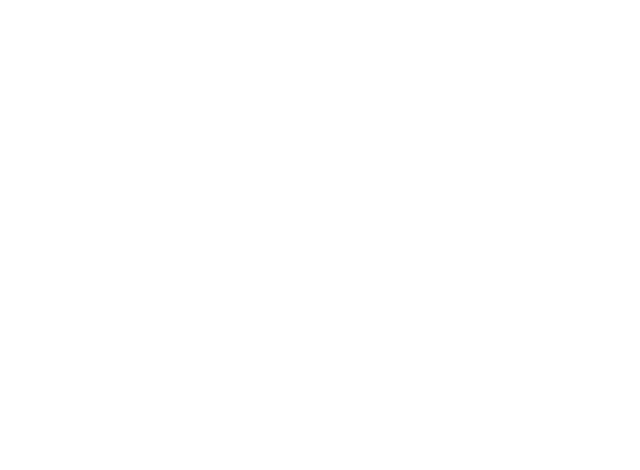

<IPython.core.display.Javascript object>


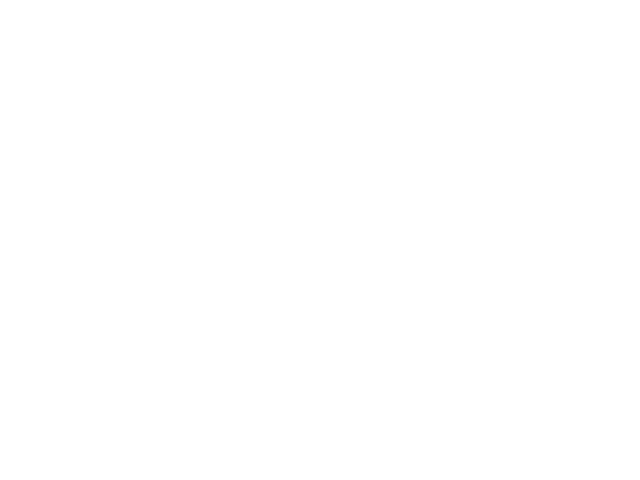

<IPython.core.display.Javascript object>


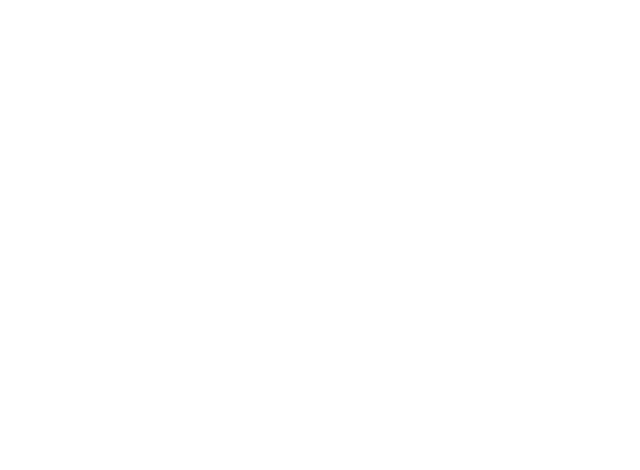

<IPython.core.display.Javascript object>


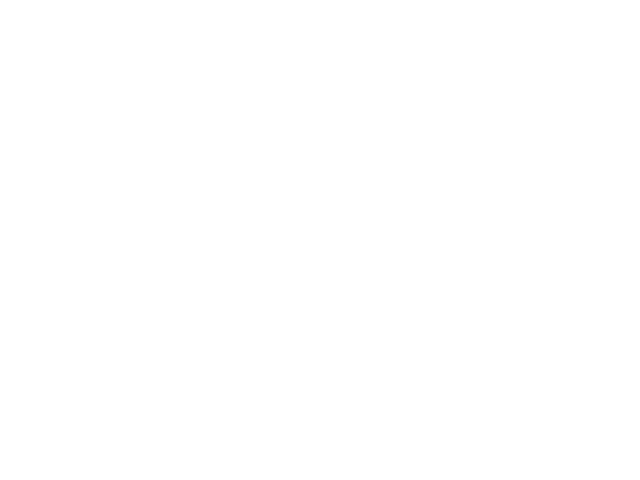

<IPython.core.display.Javascript object>


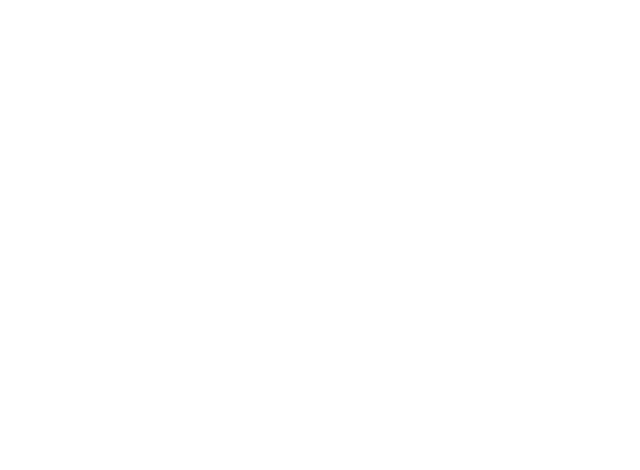

<IPython.core.display.Javascript object>


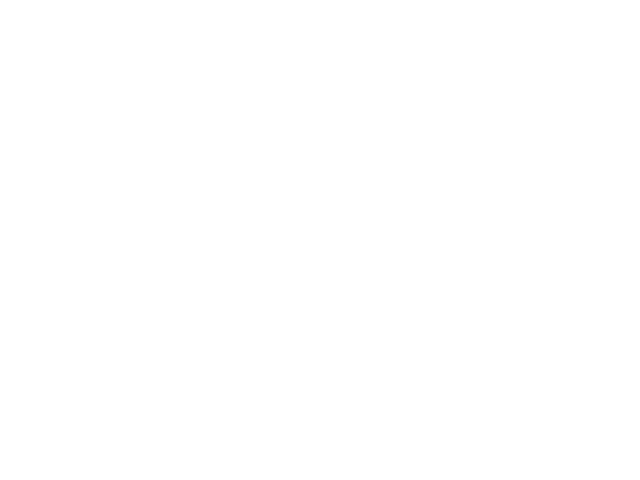

<IPython.core.display.Javascript object>


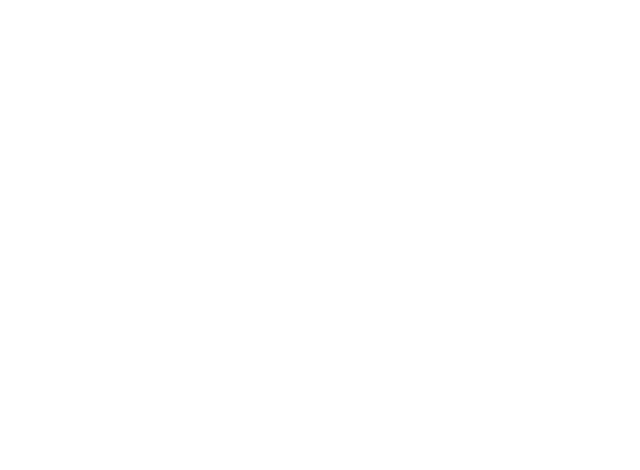

<IPython.core.display.Javascript object>


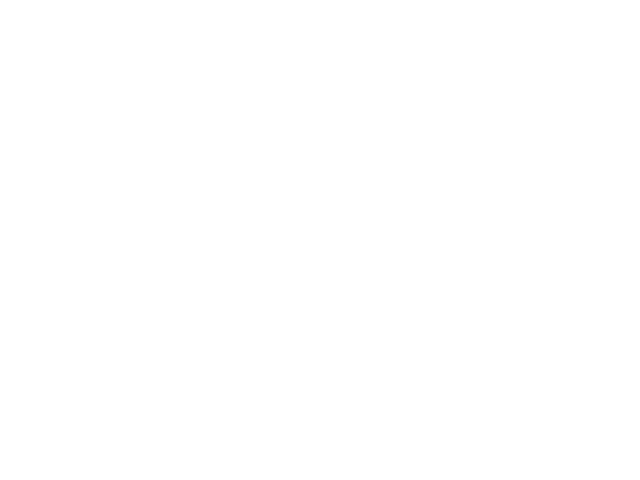

<IPython.core.display.Javascript object>


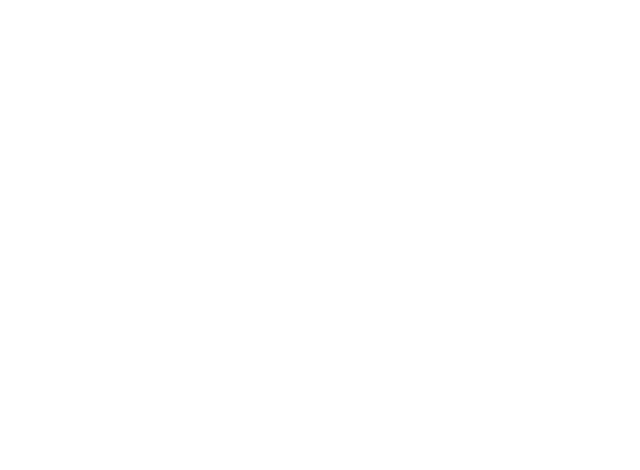

<IPython.core.display.Javascript object>


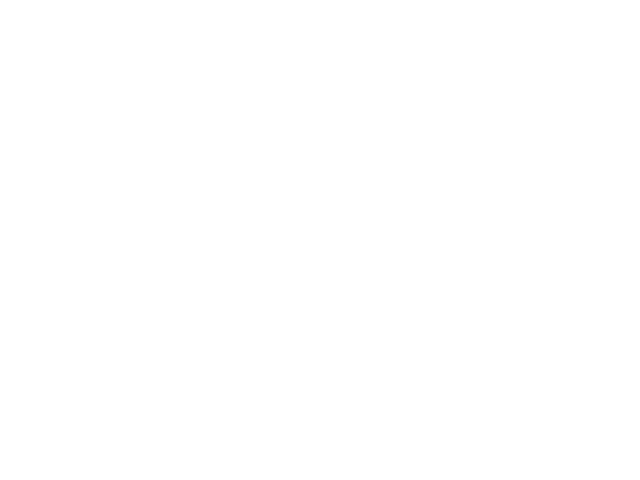

<IPython.core.display.Javascript object>


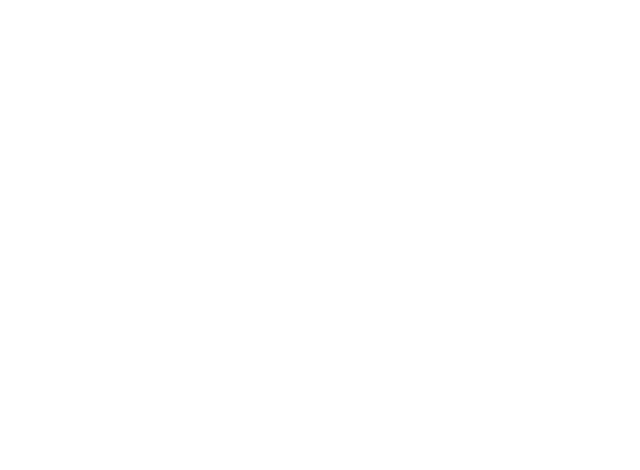

<IPython.core.display.Javascript object>


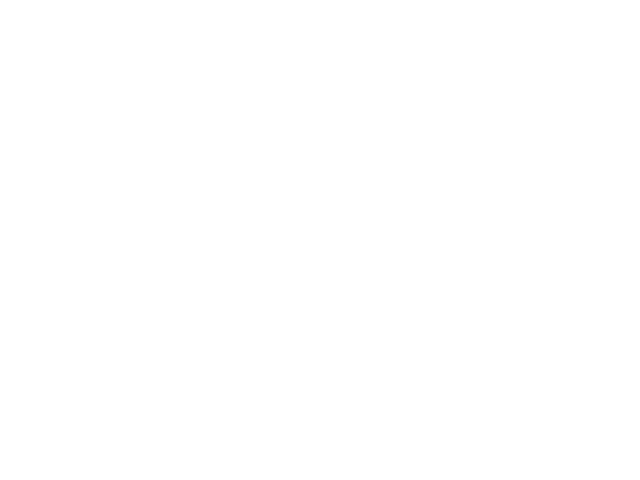

<IPython.core.display.Javascript object>


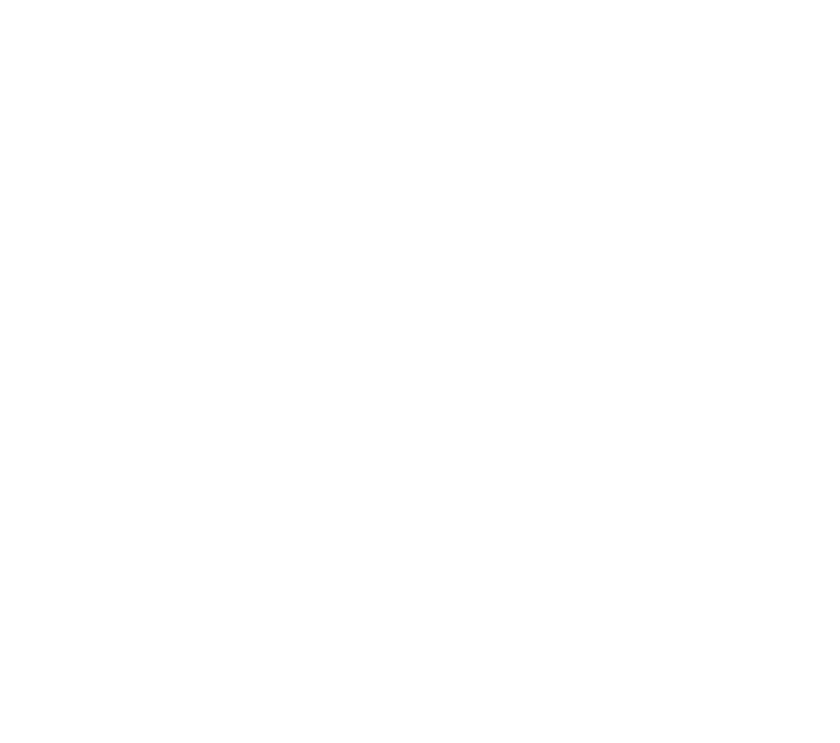

They are stored in the following folder: /home/braincreator/Pose_estimation/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/labeled-data/MovieS2_Perturbation_noLaser_compressed_labeled.


<IPython.core.display.Javascript object>


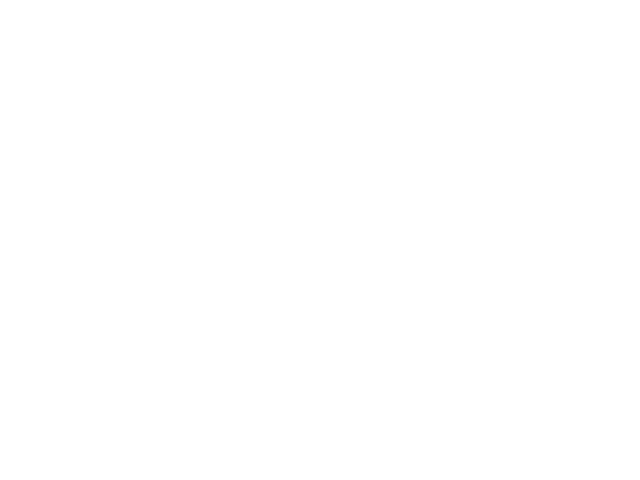

<IPython.core.display.Javascript object>


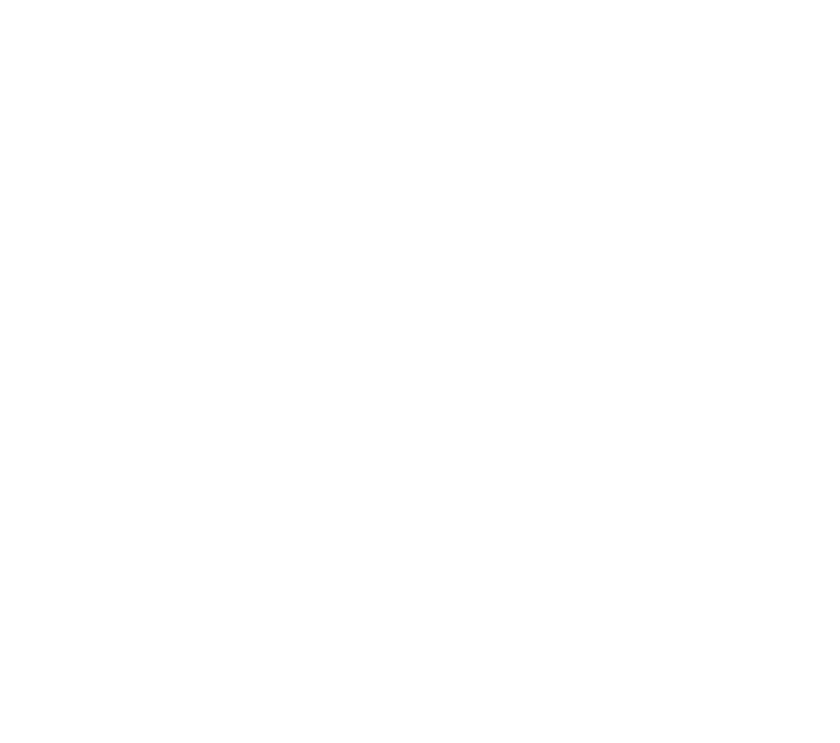

<IPython.core.display.Javascript object>


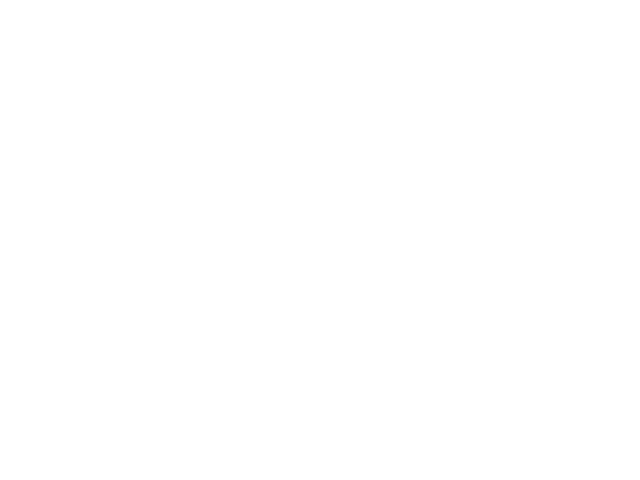

<IPython.core.display.Javascript object>


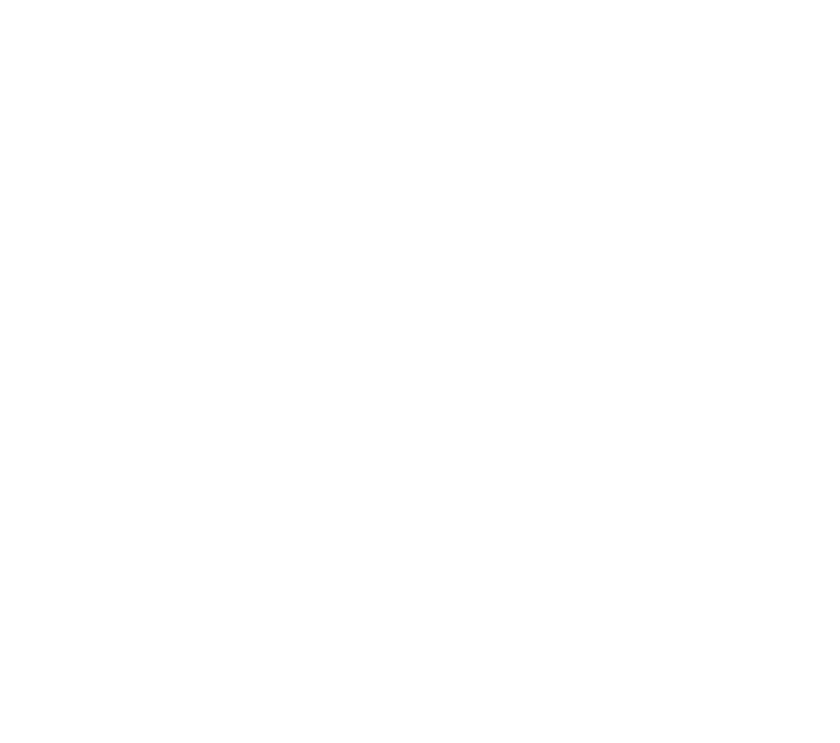

<IPython.core.display.Javascript object>


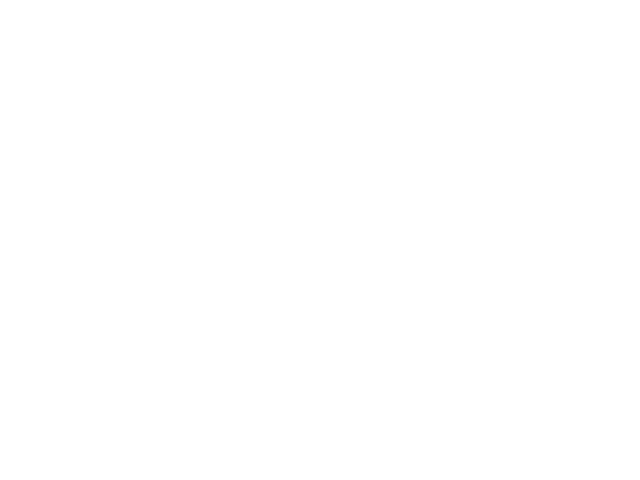

<IPython.core.display.Javascript object>


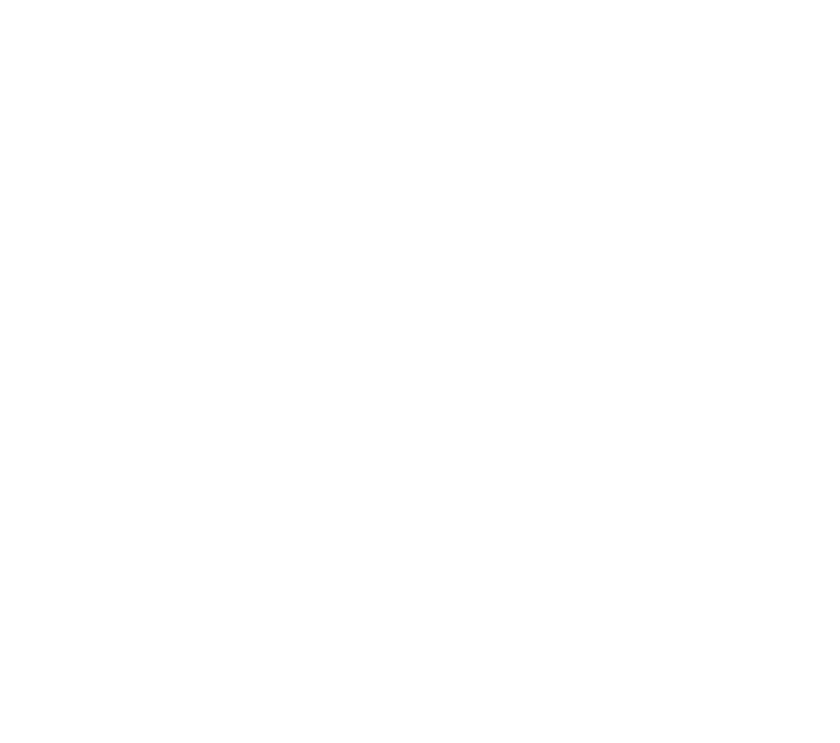

<IPython.core.display.Javascript object>


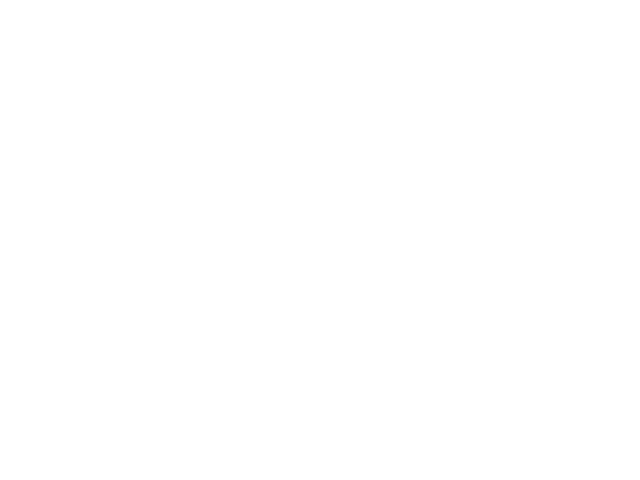

<IPython.core.display.Javascript object>


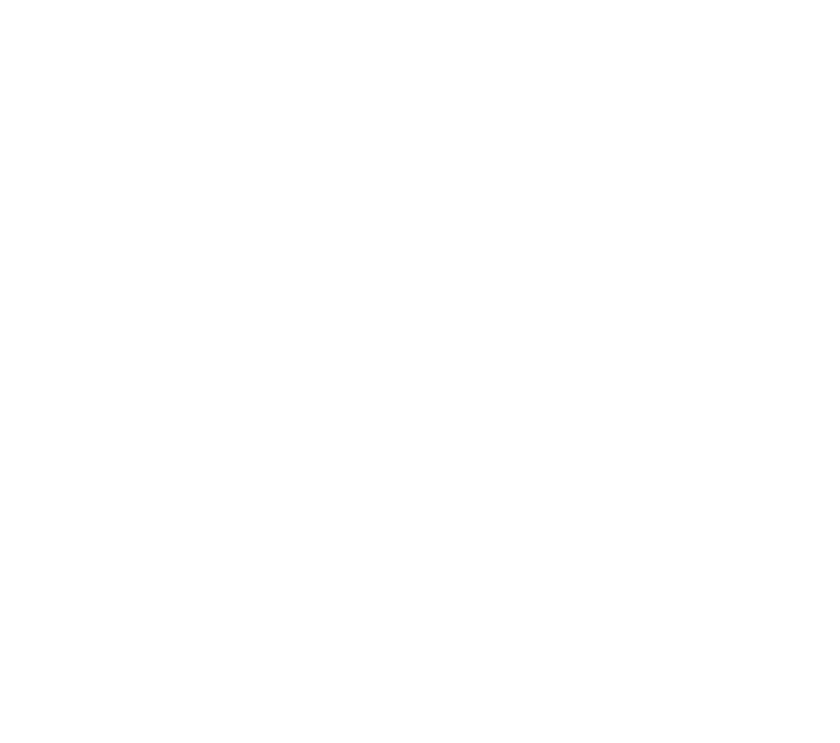

<IPython.core.display.Javascript object>


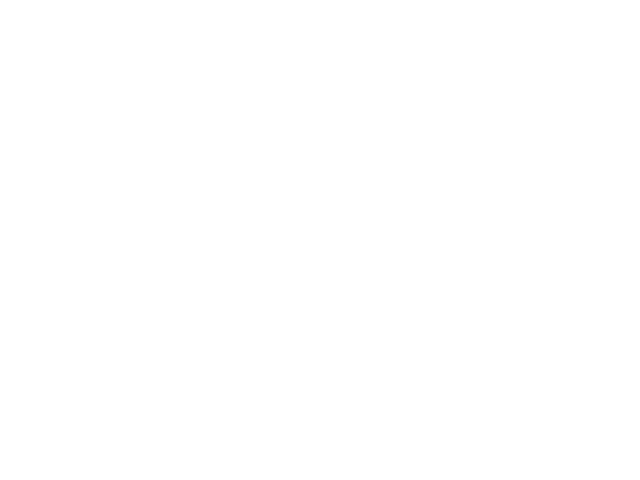

<IPython.core.display.Javascript object>


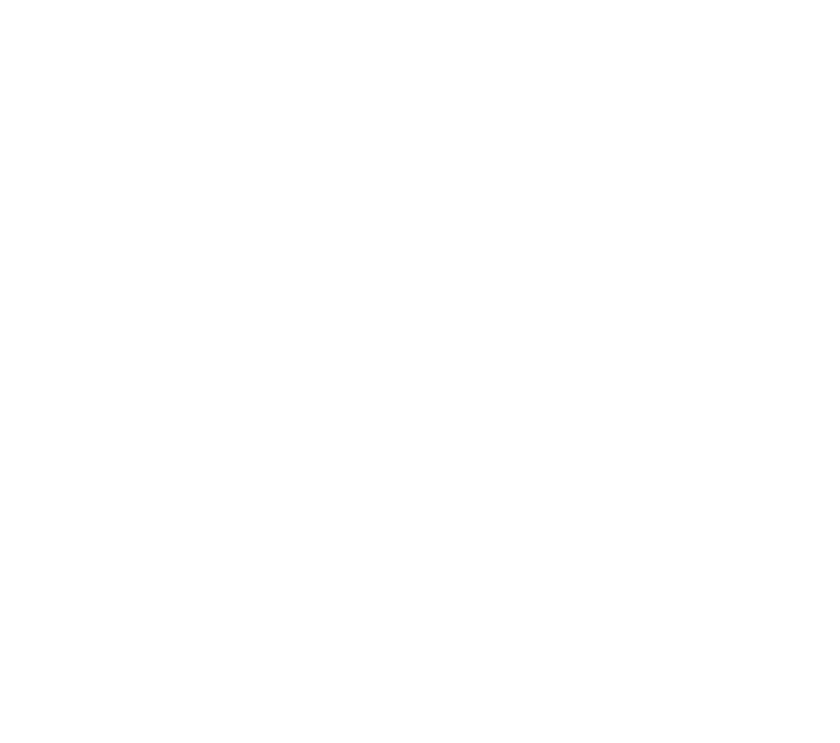

<IPython.core.display.Javascript object>


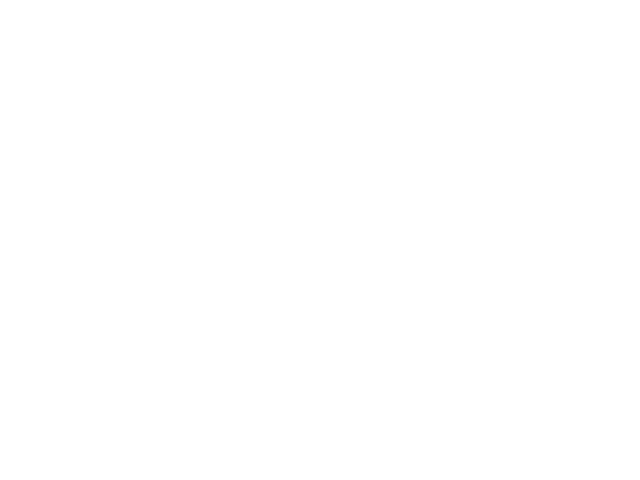

<IPython.core.display.Javascript object>


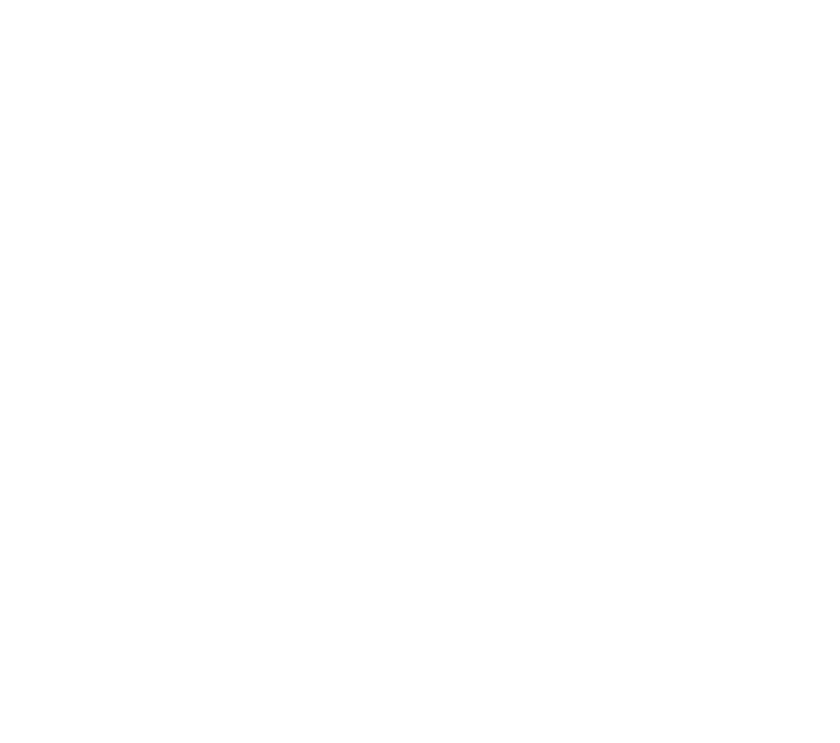

<IPython.core.display.Javascript object>


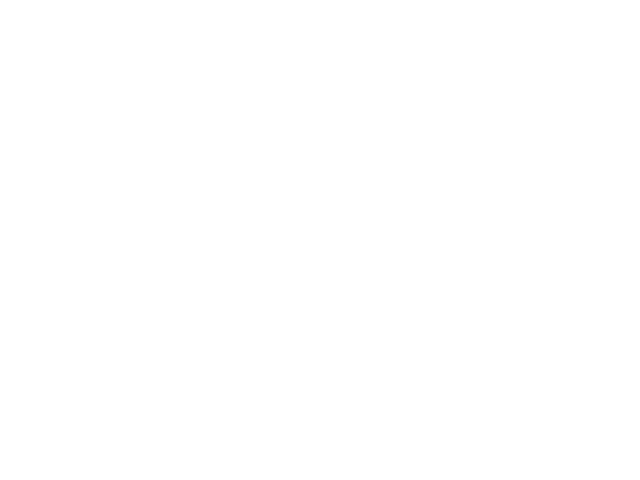

<IPython.core.display.Javascript object>


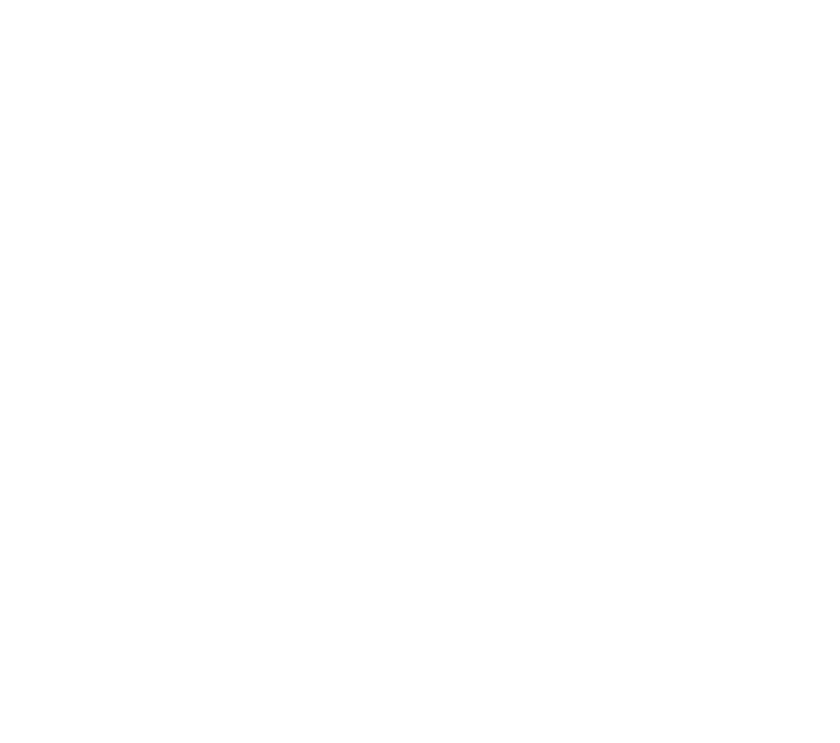

<IPython.core.display.Javascript object>


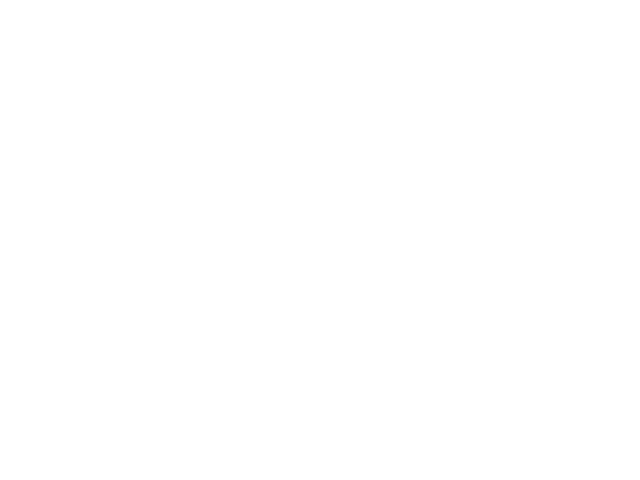

<IPython.core.display.Javascript object>


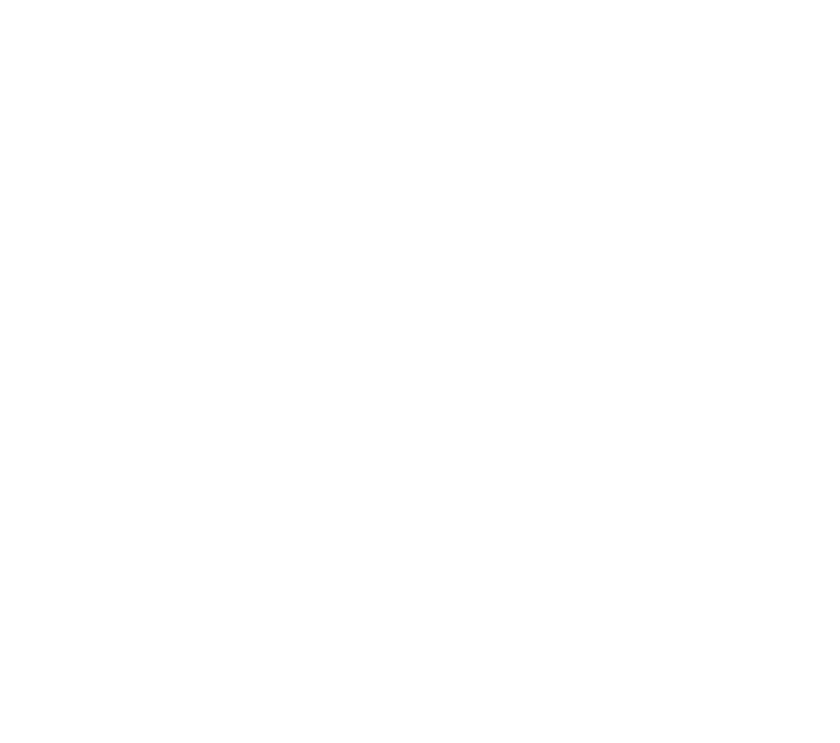

<IPython.core.display.Javascript object>


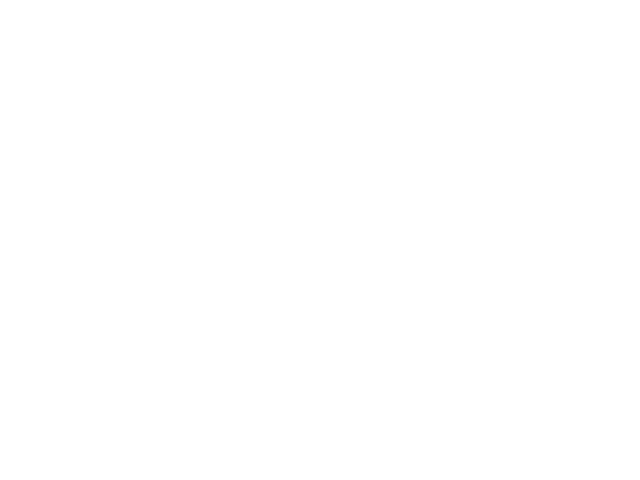

<IPython.core.display.Javascript object>


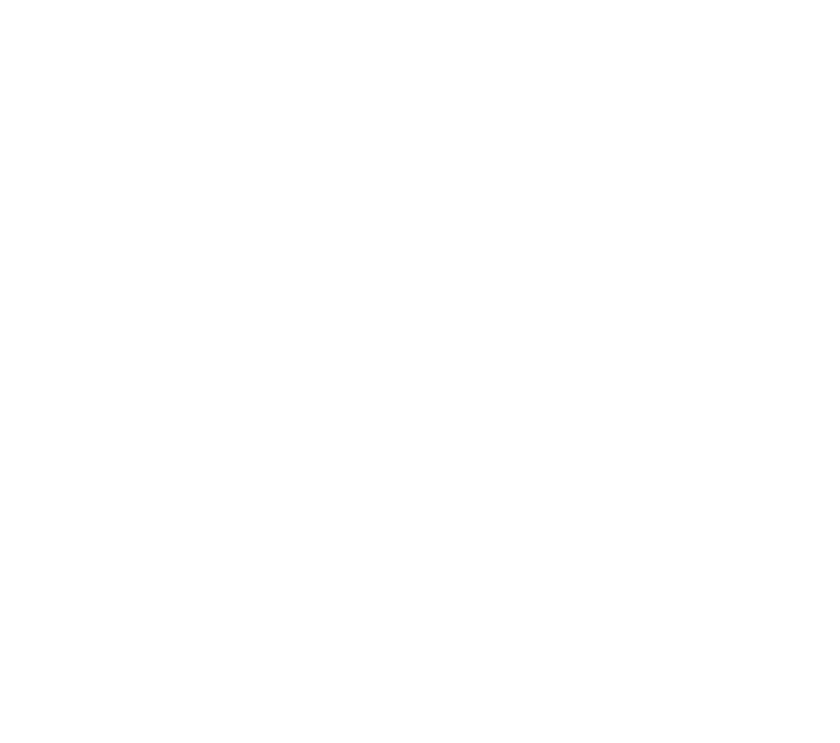

<IPython.core.display.Javascript object>


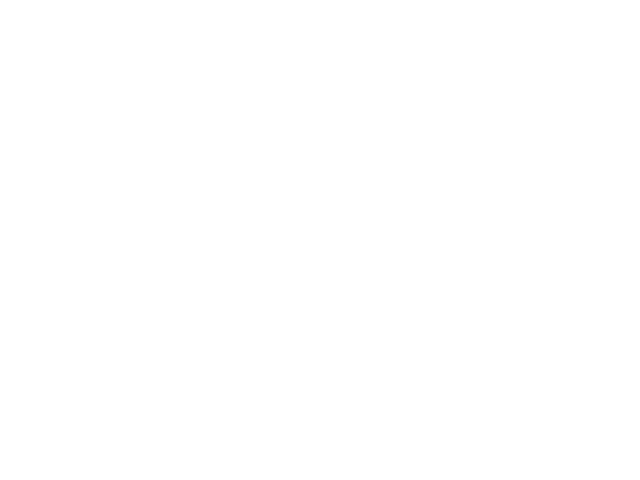

<IPython.core.display.Javascript object>


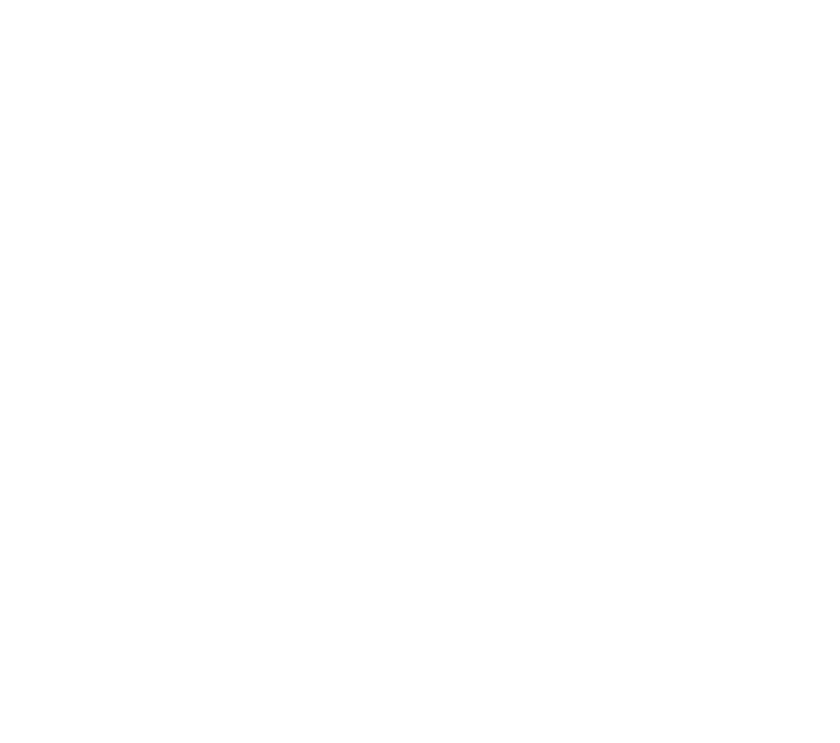

<IPython.core.display.Javascript object>


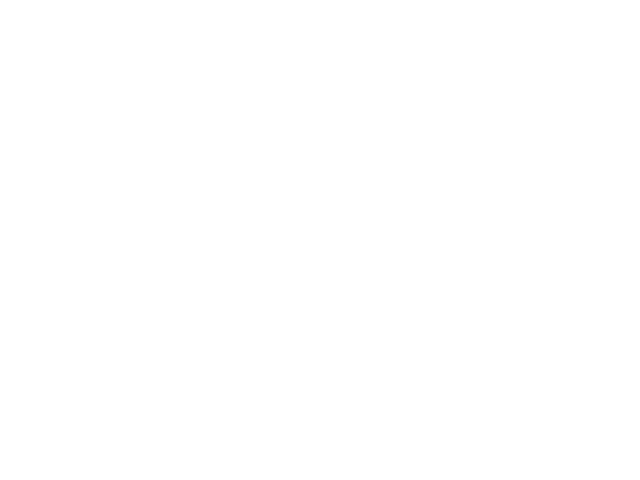

<IPython.core.display.Javascript object>


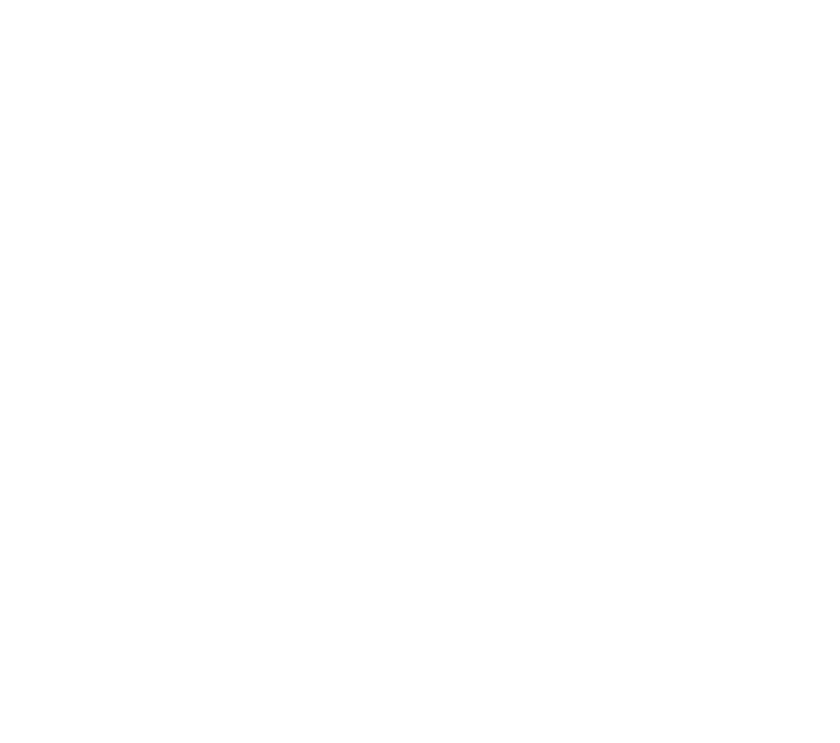

<IPython.core.display.Javascript object>


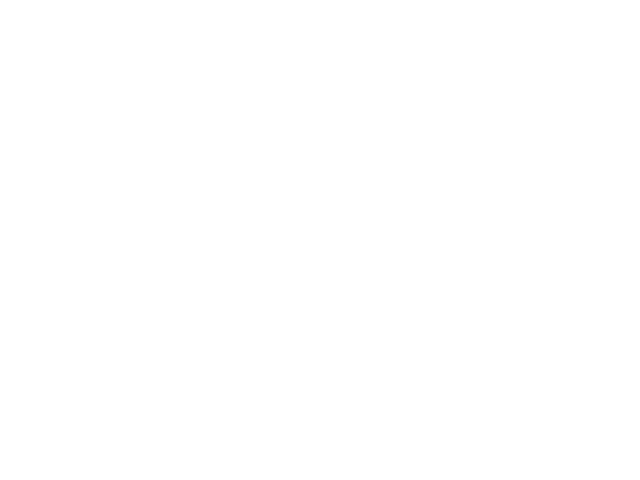

<IPython.core.display.Javascript object>


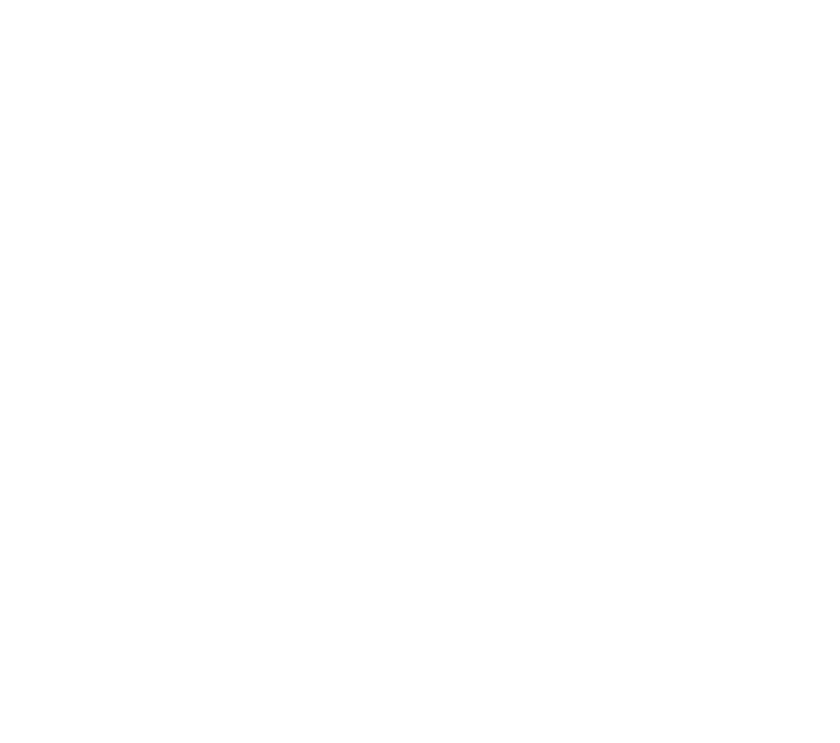

<IPython.core.display.Javascript object>


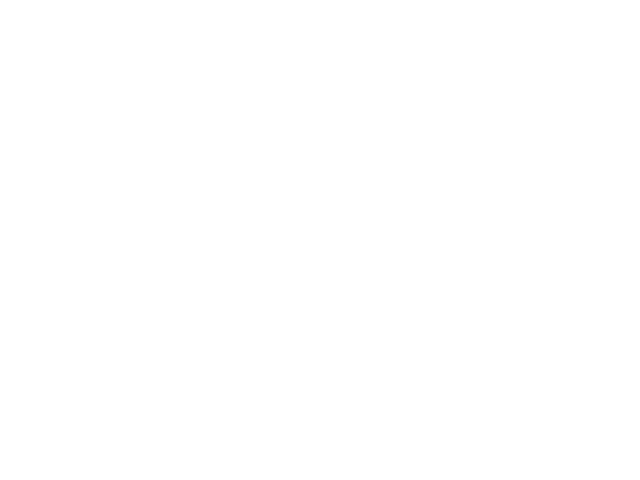

<IPython.core.display.Javascript object>


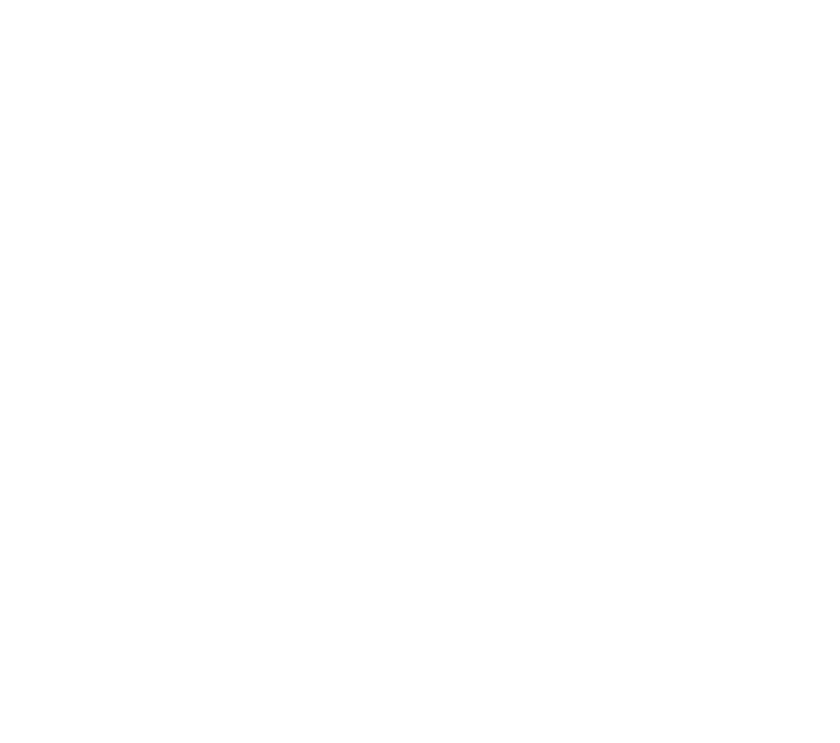

<IPython.core.display.Javascript object>


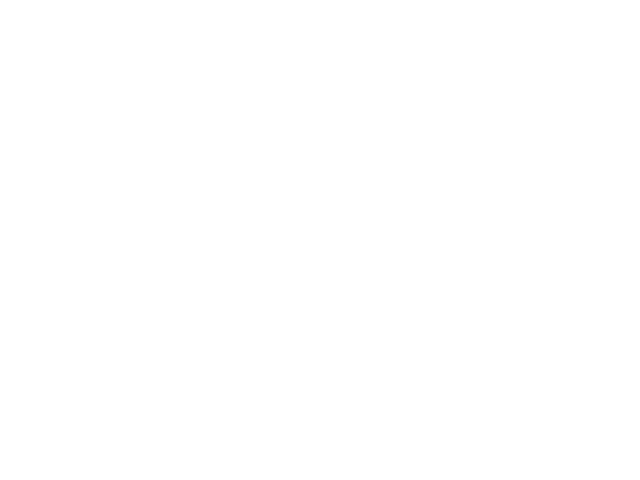

<IPython.core.display.Javascript object>


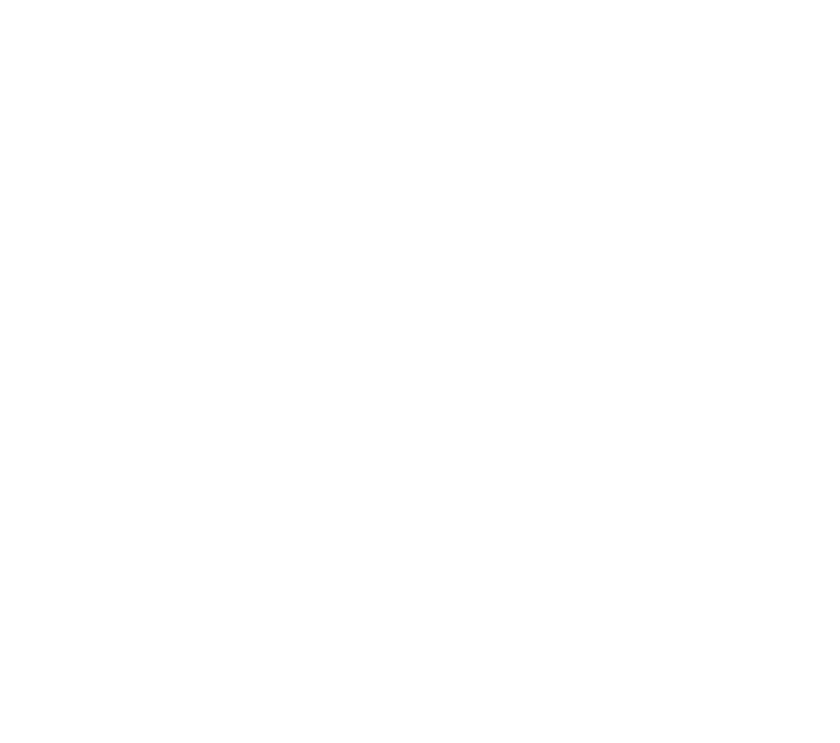

<IPython.core.display.Javascript object>


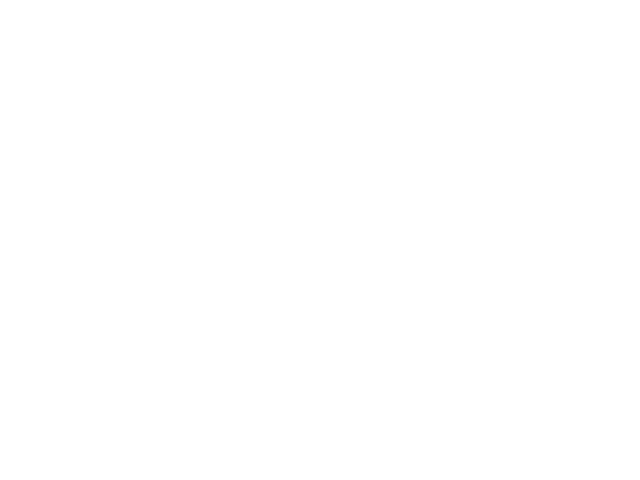

<IPython.core.display.Javascript object>


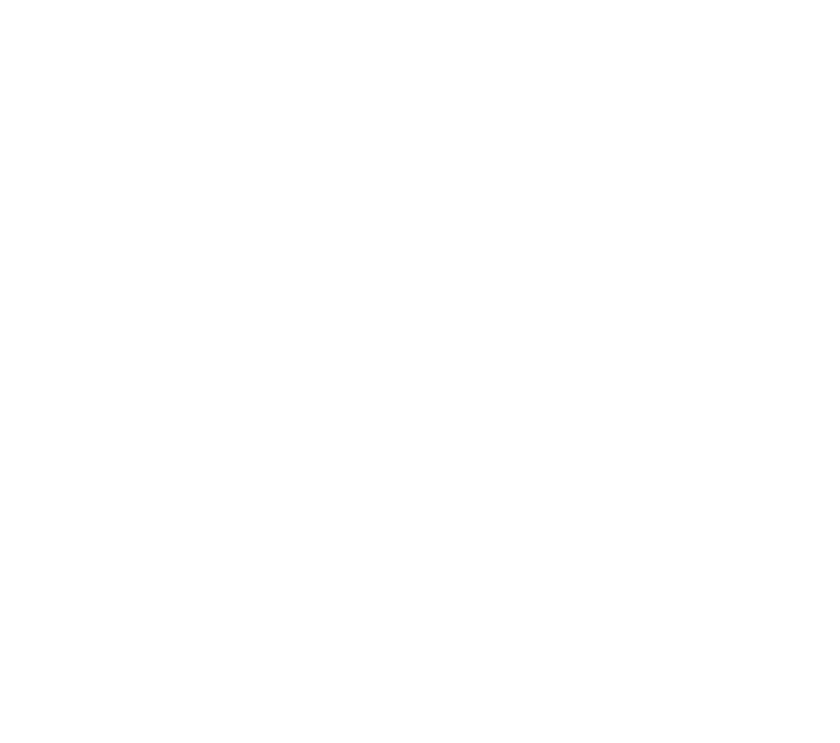

<IPython.core.display.Javascript object>


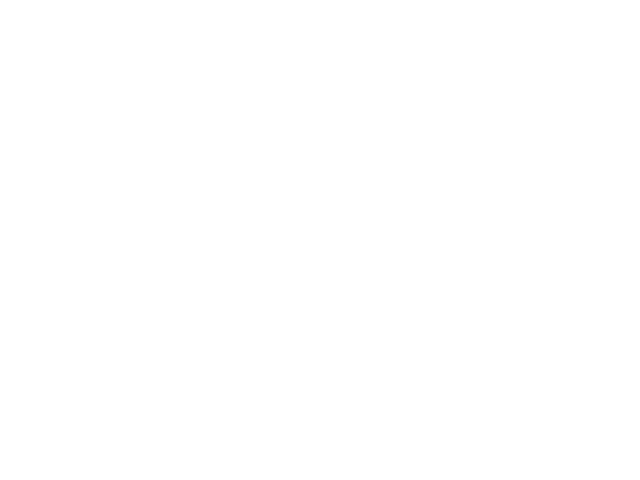

<IPython.core.display.Javascript object>


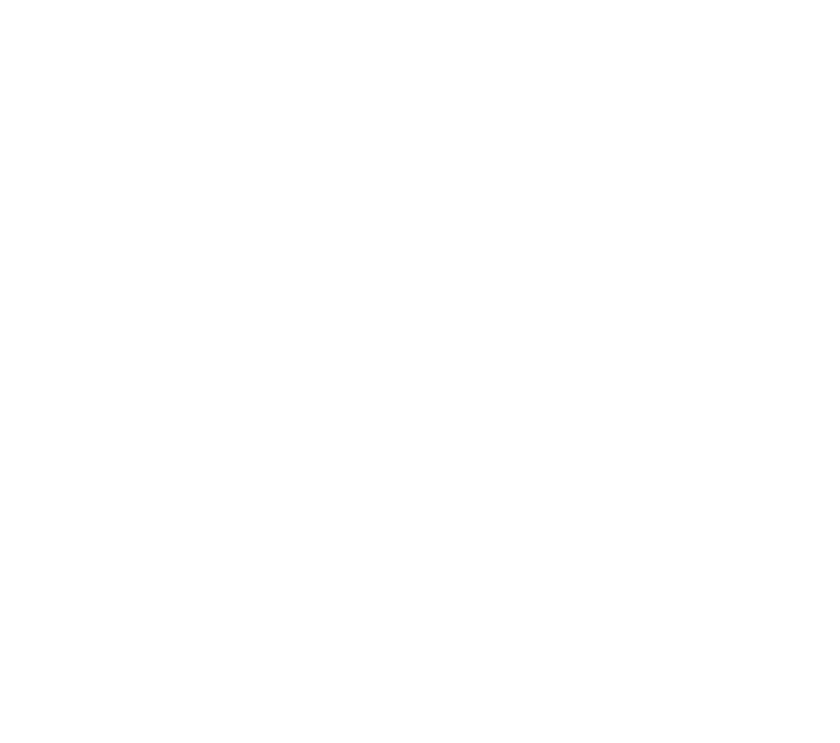

<IPython.core.display.Javascript object>


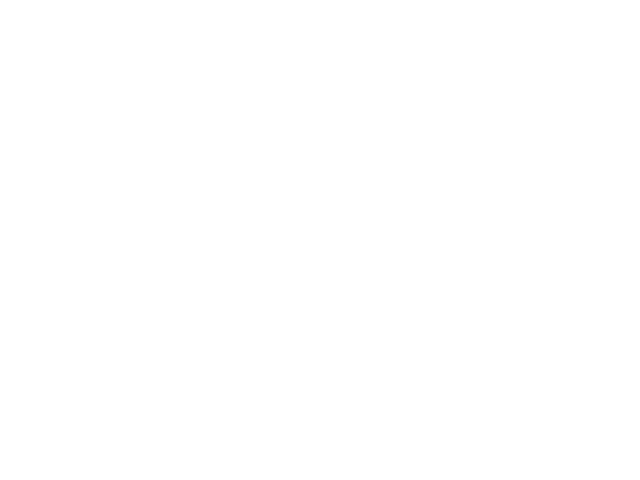

<IPython.core.display.Javascript object>


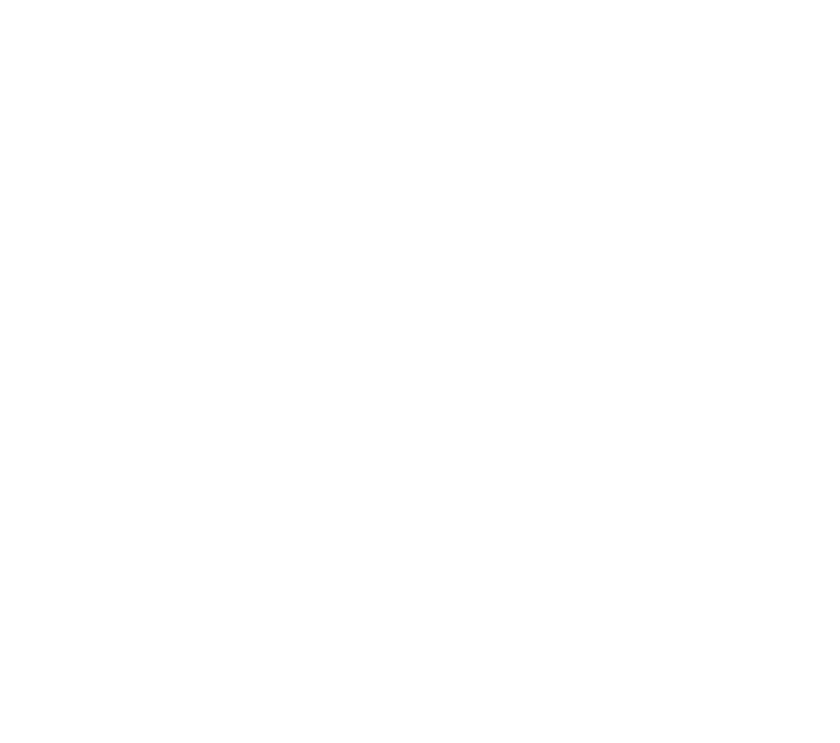

<IPython.core.display.Javascript object>


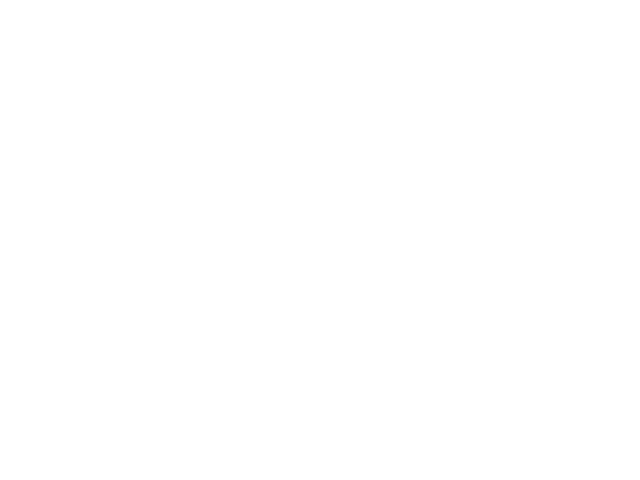

<IPython.core.display.Javascript object>


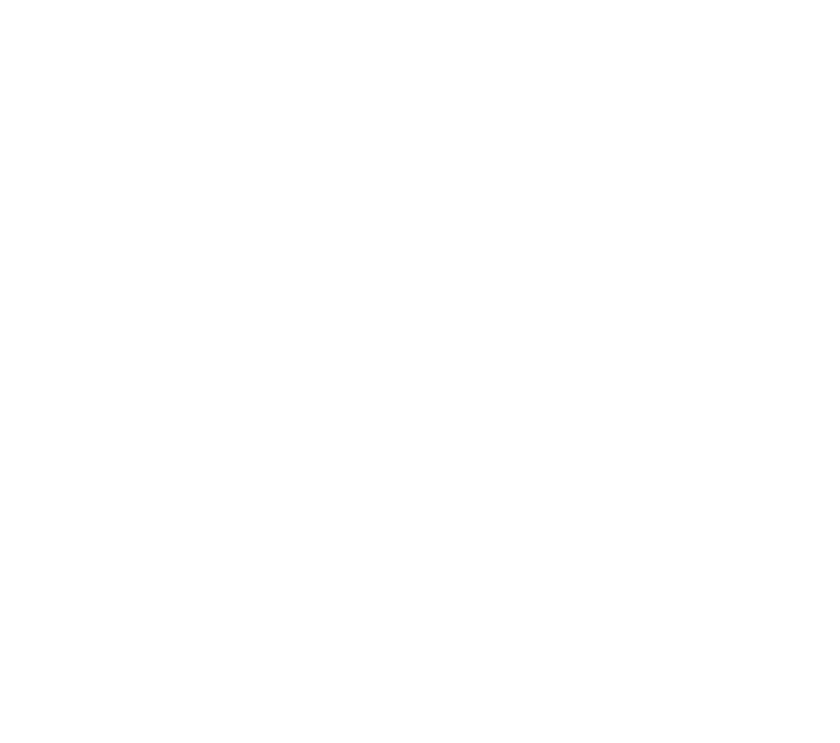

<IPython.core.display.Javascript object>


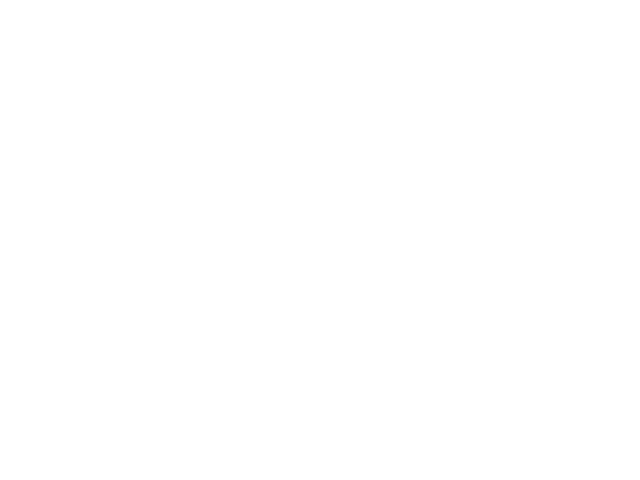

<IPython.core.display.Javascript object>


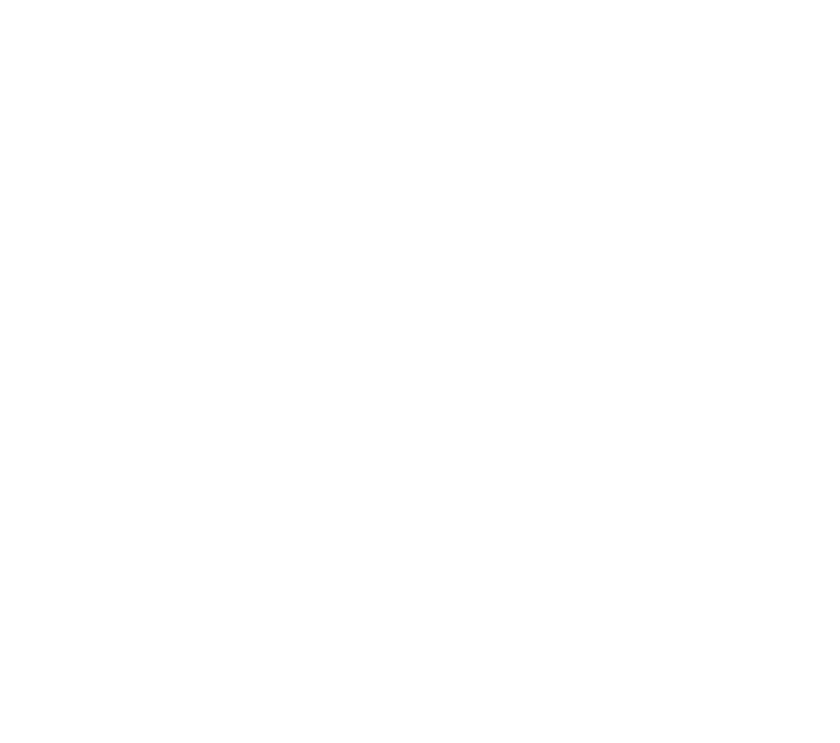

If all the labels are ok, then use the function 'create_training_dataset' to create the training dataset!


In [14]:
#Perhaps plot the labels to see how how all the frames are annoted (including the refined ones)
deeplabcut.check_labels(path_config_file)

In [15]:
deeplabcut.create_training_dataset(path_config_file)

The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


Now one can train the network again... (with the expanded data set)

In [16]:
deeplabcut.train_network(path_config_file)

Config:
{'all_joints': [[0], [1], [2], [3]],
 'all_joints_names': ['Hand', 'Finger1', 'Finger2', 'Joystick'],
 'batch_size': 4,
 'bottomheight': 400,
 'crop': True,
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets/iteration-1/UnaugmentedDataSet_ReachingAug30/Reaching_Mackenzie95shuffle1.mat',
 'dataset_type': 'default',
 'deterministic': False,
 'display_iters': 1000,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': '/home/braincreator/anaconda3/envs/dlc/lib/python3.6/site-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'leftwidth': 400,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 0.05,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'max_input_size': 1500,
 'mean_pixel': [123.68, 116.779, 103.939],
 'metadataset': 'training-datasets/iteration-1/UnaugmentedDataSet_ReachingAug30/Documentation_data-Reaching_95shuff

Starting with standard pose-dataset loader.
Training parameter:
{'stride': 8.0, 'weigh_part_predictions': False, 'weigh_negatives': False, 'fg_fraction': 0.25, 'weigh_only_present_joints': False, 'mean_pixel': [123.68, 116.779, 103.939], 'shuffle': True, 'snapshot_prefix': '/home/braincreator/Pose_estimation/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/dlc-models/iteration-1/ReachingAug30-trainset95shuffle1/train/snapshot', 'log_dir': 'log', 'global_scale': 0.8, 'location_refinement': True, 'locref_stdev': 7.2801, 'locref_loss_weight': 0.05, 'locref_huber_loss': True, 'optimizer': 'sgd', 'intermediate_supervision': False, 'intermediate_supervision_layer': 12, 'regularize': False, 'weight_decay': 0.0001, 'mirror': False, 'deterministic': False, 'crop_pad': 0, 'scoremap_dir': 'test', 'dataset_type': 'default', 'use_gt_segm': False, 'batch_size': 1, 'video': False, 'video_batch': False, 'crop': True, 'cropratio': 0.4, 'minsize': 100, 'leftwidth': 400, 'rightwidth': 400, 'topheight': 

iteration: 1000 loss: 0.0174 lr: 0.005


KeyboardInterrupt: 